**Αριθμός ομάδας**: Μ06

**Πρώτο μέλος**:  
Ονοματεπώνυμο: Τζε Χριστίνα-Ουρανία <br>
Αριθμός μητρώου: 03116079 <br>
Email:  xristina.rania.tze@gmail.com <br>
**Δεύτερο μέλος**: 
Ονοματεπώνυμο: Ψαρουδάκης Ανδρέας <br>
Αριθμός μητρώου: 03116001 <br>
Email: andreaspsaroudakis@gmail.com
                   

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals # legacy compatibility

import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# helper functions

# select from from_list elements with index in index_list
def select_from_list(from_list, index_list):
  filtered_list= [from_list[i] for i in index_list]
  return(filtered_list)

# append in filtered_list the index of each element of unfilterd_list if it exists in in target_list
def get_ds_index(unfiliterd_list, target_list):
  index = 0
  filtered_list=[]
  for i_ in unfiliterd_list:
    if i_[0] in target_list:
      filtered_list.append(index)
    index += 1
  return(filtered_list)

# select a url for a unique subset of CIFAR-100 with 20, 40, 60, or 80 classes
def select_classes_number(classes_number = 20):
  cifar100_20_classes_url = "https://pastebin.com/raw/nzE1n98V"
  cifar100_40_classes_url = "https://pastebin.com/raw/zGX4mCNP"
  cifar100_60_classes_url = "https://pastebin.com/raw/nsDTd3Qn"
  cifar100_80_classes_url = "https://pastebin.com/raw/SNbXz700"
  if classes_number == 20:
    return cifar100_20_classes_url
  elif classes_number == 40:
    return cifar100_40_classes_url
  elif classes_number == 60:
    return cifar100_60_classes_url
  elif classes_number == 80:
    return cifar100_80_classes_url
  else:
    return -1

In [ ]:
# load the entire dataset
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.optimizers import Adam, SGD,Nadam,RMSprop,Adagrad
from tensorflow.keras.losses import SparseCategoricalCrossentropy,MSE

(x_train_all, y_train_all), (x_test_all, y_test_all) = tf.keras.datasets.cifar100.load_data(label_mode='fine')

169009152/169001437 [==============================] - 4s 0us/step


In [ ]:
# Team Number
team_seed = 6

# Number of classes
num_of_classes = 20

# Batch size 
batches = 32

In [ ]:
# select the number of classes
cifar100_classes_url = select_classes_number(num_of_classes)

In [ ]:
team_classes = pd.read_csv(cifar100_classes_url, sep=',', header=None)
CIFAR100_LABELS_LIST = pd.read_csv('https://pastebin.com/raw/qgDaNggt', sep=',', header=None).astype(str).values.tolist()[0]

our_index = team_classes.iloc[team_seed,:].values.tolist()
print(our_index)
our_classes = select_from_list(CIFAR100_LABELS_LIST, our_index)
train_index = get_ds_index(y_train_all, our_index)
test_index = get_ds_index(y_test_all, our_index)


x_train_ds = np.asarray(select_from_list(x_train_all, train_index))
y_train_ds = np.asarray(select_from_list(y_train_all, train_index))
x_test_ds = np.asarray(select_from_list(x_test_all, test_index))
y_test_ds = np.asarray(select_from_list(y_test_all, test_index))

[1, 7, 9, 10, 14, 16, 18, 21, 28, 29, 32, 35, 54, 71, 77, 79, 83, 87, 90, 98]


In [ ]:
# print our classes
print(our_classes)

[' aquarium_fish', ' beetle', ' bottle', ' bowl', ' butterfly', ' can', ' caterpillar', ' chimpanzee', ' cup', ' dinosaur', ' flatfish', ' girl', ' orchid', ' sea', ' snail', ' spider', ' sweet_pepper', ' television', ' train', ' woman']


Train: X=(8500, 32, 32, 3), y=(8500, 1)
Validation: X=(1500, 32, 32, 3), y=(1500, 1)
Test: X=(2000, 32, 32, 3), y=(2000, 1)


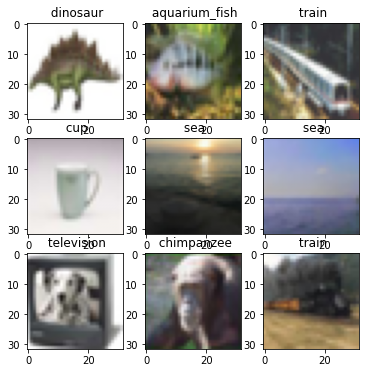

In [ ]:
# get (train) dataset dimensions
data_size, img_rows, img_cols, img_channels = x_train_ds.shape

# set validation set percentage (wrt the training set size)
validation_percentage = 0.15
val_size = round(validation_percentage * data_size)


# Reserve val_size samples for validation and normalize all values
x_val = x_train_ds[-val_size:]/255
y_val = y_train_ds[-val_size:]
x_train = x_train_ds[:-val_size]/255
y_train = y_train_ds[:-val_size]
x_test = x_test_ds/255
y_test = y_test_ds


# summarize loaded dataset
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Validation: X=%s, y=%s' % (x_val.shape, y_val.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))

# get class label from class index
def class_label_from_index(fine_category):
  return(CIFAR100_LABELS_LIST[fine_category.item(0)])

# plot first few images
plt.figure(figsize=(6, 6))
for i in range(9):
	# define subplot
  plt.subplot(330 + 1 + i).set_title(class_label_from_index(y_train[i]))
	# plot raw pixel data
  plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
  #show the figure
plt.show()

## **Μετασχηματισμός των labels**

Επειδή ο αριθμός των κλάσεων με τις οποίες δουλεούμε (20,40,60 ή 80) είναι διαφορετικός του αριθμού των κλάσεων του Cifar (100) μετασχηματίζουμε αρχικά τα labels της ομάδας μας σε νέες τιμές εντός του διαστήματος [0,num_of_classes). Για τον σκοπό αυτό ορίζουμε τις συναρτήσεις **create_dict** και **create_new_labels**. Η πρώτη δέχεται σαν όρισμα μία ταξινομημένη λίστα, our_index, η οποία περιέχει τα labels όπως αυτά προκύπτουν με βάση τον κωδικό της ομάδας μας, και επιστρέφει ένα λεξικό με τις αντιστοιχίσεις των νέων labels σε νέα από 0 μέχρι num_of_classes - 1. Η δεύτερη δημιουργεί και επιστρέφει έναν πίνακα διαστάσεων όσο ο αρχικός πίνακας y_train ο οποίος περιέχει το νέο label όλων των εικόνων με βάση την αντιστοίχιση που ορίζει το λεξικό της create_dict. 

In [ ]:
def create_dict(old_labels):
  d = dict()
  counter = 0
  for i in range(len(old_labels)):
    d[old_labels[i]] = counter
    counter = counter + 1
  return d

In [ ]:
def create_new_labels(old_labels,y_train):
  d = create_dict(old_labels)
  new_labels = np.zeros((y_train.shape[0],y_train.shape[1])).astype(np.uint8)
  for i in range(y_train.shape[0]): # For every image replace the old label with the new one
    new_labels[i] = d[y_train[i][0]]
  return new_labels

In [ ]:
y_train_new = create_new_labels(our_index,y_train)
y_val_new = create_new_labels(our_index,y_val)
y_test_new = create_new_labels(our_index,y_test)

$\LARGE \textit{Ερώτημα 1}$ 

## **Δημιουργία, Μεταγλώττιση, Εκπαίδευση και Αξιολόγηση μοντέλων**



Στο Ερώτημα αυτό σχεδιάζουμε, μεταγλωτίζουμε και εκπαιδεύουμε μια σειρά από μοντέλα πάνω στο σύνολο δεδομένων **CIFAR-100** με χρήση του **TensorFlow**. 

Για το σκοπό αυτό, ορίζουμε τη συνάρτηση **model_creator()**, η οποία δέχεται ως ορίσματα: το μοντέλο (model), τον optimizer (opt), τη συνάρτηση απώλειας (loss_function), τον αριθμό των εποχών (num_of_epochs) καθώς και τη μετρική ακρίβειας (metric_score). Η συνάρτηση εμφανίζει μια σύνοψη της αρχιτεκτονικής του μοντέλου, το μεταγλωτίζει και το εκπαιδεύει πάνω στα train δεδομένα. Τέλος, αφού ολοκληρωθεί η εκπαίδευσή του, απεικονίζει σε κοινό διάγραμμα την ακρίβεια εκπαίδευσης και την ακρίβεια επικύρωσης στο σύνολο όλων των εποχών.

In [ ]:
def model_creator(model,opt,loss_function,num_of_epochs,metric_score='accuracy'):

  # Model summary
  model.summary()
  
  # Compile model
  model.compile(optimizer=opt,
              loss=loss_function,
              metrics=[metric_score])
      
  # Train model
  history = model.fit(x_train, y_train_new,batch_size = batches, epochs=num_of_epochs, validation_data=(x_val,y_val_new))

  fig, ax = plt.subplots(1, 2)

  fig.set_figheight(5)
  fig.set_figwidth(17)

  # Plot accuracy
  ax[0].plot(history.history['accuracy'])
  ax[0].plot(history.history['val_accuracy'])
  ax[0].set_title('model accuracy')
  ax[0].set_ylabel('accuracy')
  ax[0].set_xlabel('epoch')
  ax[0].legend(['train', 'val'], loc='best')

  # Plot loss
  ax[1].plot(history.history['loss'])
  ax[1].plot(history.history['val_loss'])
  ax[1].set_title('model loss')
  ax[1].set_ylabel('loss')
  ax[1].set_xlabel('epoch')
  ax[1].legend(['train', 'val'], loc='best')

Έχοντας πλέον εκπαιδεύσει το μοντέλο αξιοποιούμε τη συνάρτηση **evaluate** ώστε να εξετάσουμε την ακρίβειά του πάνω στα δεδομένα ελέγχου. Συγκεκριμένα, τυπώνουμε τόσο το **test accuracy** όσο και το **test loss**. Η διαδικασία αυτή πραγματοποιείται μέσω της συνάρτησης **model_evaluation** η οποία δέχεται ως όρισμα το εκπαιδευμένο μοντέλο.

In [ ]:
def model_evaluation(model):
  test_loss, test_acc = model.evaluate(x_test,  y_test_new, verbose=0)
  print("Test Accuracy =",test_acc)
  print("Test Loss =",test_loss)

Οι δύο αυτοί δείκτες (test accuracy και test loss) καθορίζουν την ποιότητα του μοντέλου μας. Συγκεκριμένα, επιδιώκουμε να έχουμε υψηλό accuracy και χαμηλό loss. Το πρώτο εκφράζει το ποσοστό ορθής κατηγοριοποίησης των δεδομένων ελέγχου και το δεύτερο τη βεβαιότητα με την οποία το μοντέλο κατατάσσει τις εικόνες σε κατηγορίες. Στόχος μας λοιπόν είναι η μεγιστοποίηση του accuracy και η παράλληλη ελαχιστοποίηση του loss.

### 1) **Softmax (baseline)**: FC(200), SOFTMAX


Το νευρωνικό αυτό δίκτυο είναι αρκετά απλό καθώς αποτελείται μόνο από 2 διαδοχικά Fully Connected Layers, από τα οποία το πρώτο περιλαμβάνει 200 νευρώνες και το δεύτερο και τελευταίο (output layer) περιλαμβάνει πλήθος νευρώνων ίσο με τον αριθμό των εκάστοτε κλάσεων που ορίζουμε. Για το πρωτελευταίο layer επιλέγουμε ως συνάρτηση ενεργοποίησης (activation fucntion) μια relu ενώ το output layer διαθέτει μια συνάρτηση ενεργοποίησης softmax.

In [ ]:
def create_model_softmax(): 
  model_softmax = keras.Sequential([
      keras.layers.Flatten(input_shape=(32,32,3)),
      keras.layers.Dense(200,activation='relu'),
      keras.layers.Dense(num_of_classes,activation='softmax')
  ])
  return model_softmax

Ένα σχηματικό διάγραμμα της παραπάνω αρχιτεκτονικής φαίνεται στο ακόλουθο σχήμα:

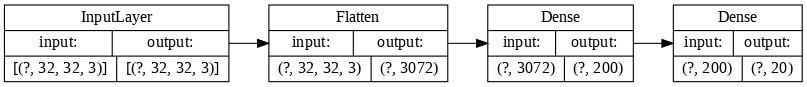

In [ ]:
model_softmax = create_model_softmax()
tf.keras.utils.plot_model(model_softmax, to_file='model.png', show_shapes=True, show_layer_names=False,rankdir='LR', expand_nested=False, dpi=80)

Μετά από δοκιμές πολλαπλών συνδυασμών **optimizer, loss, metric και epoch** καταλήγουμε στο ότι οι 2 καλύτεροι δυνατοί συνδυασμοί για το μοντέλο **Softmax** (που εξασφαλίζουν το μεγαλύτερο ποσοστό ακρίβειας για το σύνολο των δεδομένων ελέγχου-test accuracy) είναι οι ακόλουθοι:


*    **Optimizer = SGD(), loss = SparseCategoricalCrossentropy(), metric = 'accuracy', epochs = 100** 

*   **Optimizer = Adagrad(), loss = SparseCategoricalCrossentropy(), metric = 'accuracy', epochs = 200** 


**<u>Σημείωση</u>:** Ως παράμετρος metric επιλέγχθηκε να είναι το 'accuracy' καθώς εκφράζει μια άμεση ποσοστιαία μέτρηση της ακρίβειας του κάθε μοντέλου και είναι ευρέως χρησιμοποιούμενη. Θα μπορούσαμε να είχαμε επιλέξει κάποια εναλλακτική μετρική απόδοσης, ωστόσο και για λόγους σύγκρισης μεταξύ των διαφορετικών μοντέλων διατηρούμε την ίδια σε κάθε περίπτωση.



#### 1) **Optimizer = SGD(), loss = SparseCategoricalCrossentropy(), metric = 'accuracy', epochs = 100** 

Αξιοποιούμε τις συναρτήσεις **create_model_softmax** και **model_creator** για την δημιουργία, μεταγλώττιση και εκπαίδευση του μοντέλου:

Model: "sequential_47"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_47 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dense_114 (Dense)            (None, 200)               614600    
_________________________________________________________________
dense_115 (Dense)            (None, 20)                4020      
Total params: 618,620
Trainable params: 618,620
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
266/266 [==============================] - 1s 4ms/step - loss: 2.7598 - accuracy: 0.1666 - val_loss: 2.6777 - val_accuracy: 0.1560
Epoch 2/100
266/266 [==============================] - 1s 4ms/step - loss: 2.5244 - accuracy: 0.2442 - val_loss: 2.5249 - val_accuracy: 0.2613
Epoch 3/100
266/266 [==============================] - 1s 4ms/step - loss: 2.4183 - accurac

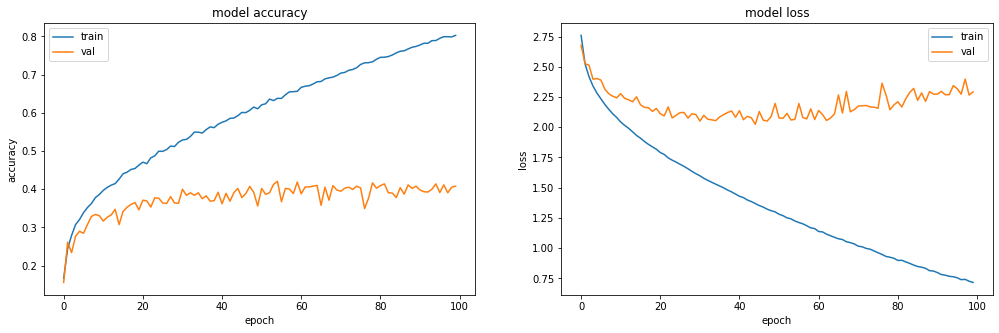

In [ ]:
softmax_sgd = create_model_softmax()
model_creator(softmax_sgd,SGD(),SparseCategoricalCrossentropy(),num_of_epochs=100)

Καλούμε τώρα τη συνάρτηση **model_evaluation** με όρισμα το μοντέλο μας για την αξιολόγησή της απόδοσής του:

In [ ]:
model_evaluation(softmax_sgd)

Test Accuracy = 0.42500001192092896
Test Loss = 2.247209072113037


Παρατηρούμε πως για τα test δεδομένα λαμβάνουμε **ποσοστό ακρίβειας (accuracy)  42,5% καθώς και σφάλμα (loss) ίσο με 2,247**. 

Όπως ήταν αναμενόμενο, λόγω της απλότητας του συγκεκριμένου μοντέλου, το ποσοστό ορθής κατηγοριοποίησης είναι αρκετά χαμηλό. Μάλιστα, φαίνεται πως δεν έχει νόημα να εκπαιδεύσουμε παραπάνω το μοντέλο μας αφού, ήδη μετά από έναν αριθμό εποχών και μετά (μικρότερο του 100), εμφανίζεται έντονα το φαινόμενο της υπερκπαίδευσης (overfitting), με την ακρίβεια επικύρωσης (validation accuracy) να μην βελτιώνεται πέραν του 40-41% (αλλά αντίθετα να κυματώνεται γύρω από αυτές τις τιμές) και με το σφάλμα επικύρωσης (validation loss) να αυξάνει καθώς συνεχίζεται η εκπαίδευση του μοντέλου.

Αξίζει να σημειωθεί ότι θα μπορούσαμε να πετύχουμε ελαφρώς καλύτερα αποτελέσματα (μικρότερο loss και ενδεχομένως λίγο μεγαλύτερο accuracy) με μικρότερο αριθμό εποχών, ωστόσο επιλέγουμε τον συγκεκριμένο αριθμό καθώς στο Ερώτημα 2, που θα αντιμετωπίσουμε με διάφορες μεθόδους το πρόβλημα του overfiting, θα κριθεί απαραιτήτος ένας μεγαλύτερος αριθμός εποχών για την βέλτιστη εκπαίδευση του μοντέλου.


#### 2) **Optimizer = Adagrad(), loss = SparseCategoricalCrossentropy(), metric = 'accuracy', epochs = 200** 


Αξιοποιούμε τις συναρτήσεις **create_model_softmax** και **model_creator** για την δημιουργία, μεταγλώττιση και εκπαίδευση του μοντέλου:

Model: "sequential_43"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_43 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dense_104 (Dense)            (None, 200)               614600    
_________________________________________________________________
dense_105 (Dense)            (None, 20)                4020      
Total params: 618,620
Trainable params: 618,620
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
266/266 [==============================] - 1s 4ms/step - loss: 2.8700 - accuracy: 0.1414 - val_loss: 2.7785 - val_accuracy: 0.1673
Epoch 2/200
266/266 [==============================] - 1s 4ms/step - loss: 2.6923 - accuracy: 0.2058 - val_loss: 2.6564 - val_accuracy: 0.2293
Epoch 3/200
266/266 [==============================] - 1s 4ms/step - loss: 2.6009 - accurac

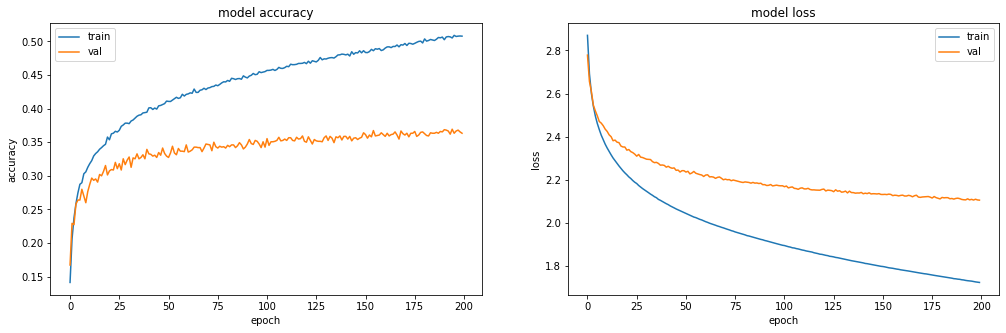

In [ ]:
softmax_adagrad = create_model_softmax()
model_creator(softmax_adagrad,Adagrad(),SparseCategoricalCrossentropy(),num_of_epochs=200)

Καλούμε τώρα τη συνάρτηση **model_evaluation** με όρισμα το μοντέλο μας για την αξιολόγησή της απόδοσής του: 

In [ ]:
model_evaluation(softmax_adagrad)

Test Accuracy = 0.39500001072883606
Test Loss = 2.0288314819335938


Παρατηρούμε πως για τα test δεδομένα λαμβάνουμε **ποσοστό ακρίβειας (accuracy)  39,5% καθώς και σφάλμα (loss) ίσο με 2,029**.

Βλέπουμε πως εδώ το ποσοστό ακρίβειας είναι ακόμα χαμηλότερο, ωστόσο το φαινόμενο της υπερεκπαίδευσης (overfitting) είναι λιγότερο έντονο καθώς, μέχρι και το τέλος της εκπαίδευσής του, το μοντέλο φαίνεται να έχει σχετικά αυξανόμενο validation accuracy και παράλληλα μειούμενο validation loss, γεγονός επιθυμητό. Παρόλα αυτά, δεν παύει να υπάρχει μια αισθητή απόκλιση μεταξύ των καμπυλών των δεδομένων εκπαίδευσης (train) που απεικονίζονται με μπλε χρώμα και των αντίστοιχων καμπυλών των δεδομένων επικύρωσης (validation) που απεικονίζονται με πορτοκαλί χρώμα.

### 2) **MLP**: FC(512), RELU, FC(200), SOFTMAX

Το νευρωνικό αυτό δίκτυο αποτελεί μια επέκταση του προηγούμενου δικτύου καθώς αποτελείται από 3 διαδοχικά Fully Connected Layers, εκ των οποίων τα 2 τελευταία είναι ίδια με αυτά του μοντέλου **Softmax**. Το αρχικό επιπλέον επίπεδο που πρoστίθεται αποτελείται από 512 νευρώνες και ενεργοποιείται από μια συνάρτηση relu.

In [ ]:
def create_model_mlp():
  model_mlp = keras.Sequential([
  keras.layers.Flatten(input_shape=(32,32,3)),
  keras.layers.Dense(512, activation='relu'),
  keras.layers.Dense(200, activation='relu'),
  keras.layers.Dense(num_of_classes, activation='softmax')
])
  return model_mlp

Ένα σχηματικό διάγραμμα της παραπάνω αρχιτεκτονικής φαίνεται στο ακόλουθο σχήμα:

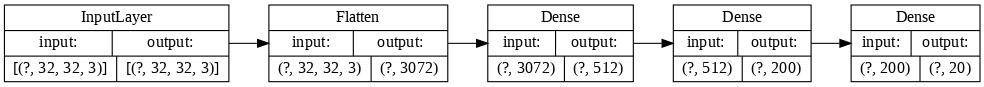

In [ ]:
model_mlp = create_model_mlp()
tf.keras.utils.plot_model(model_mlp, to_file='model.png', show_shapes=True, show_layer_names=False,rankdir='LR', expand_nested=False, dpi=80)

Μετά από πειραματισμούς με πολλές διαφορετικές παραμετροποιήσεις **optimizer, loss, metric και epoch** καταλήγουμε στο ότι οι 2 καλύτεροι δυνατοί συνδυασμοί για το μοντέλο **MLP** (που εξασφαλίζουν το μεγαλύτερο ποσοστό ακρίβειας για το σύνολο των δεδομένων ελέγχου-test accuracy) είναι οι ακόλουθοι:

*    **Optimizer = SGD(), loss = SparseCategoricalCrossentropy(), metric = 'accuracy', epochs = 100** 

*   **Optimizer = Adagrad(), loss = SparseCategoricalCrossentropy(), metric = 'accuracy', epochs = 200** 




####  1) **Optimizer = SGD(), loss = SparseCategoricalCrossentropy(), metric = 'accuracy', epochs = 100** 

Αξιοποιούμε τις συναρτήσεις **create_model_mlp** και **model_creator** για την δημιουργία, μεταγλώττιση και εκπαίδευση του μοντέλου:

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_32 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dense_78 (Dense)             (None, 512)               1573376   
_________________________________________________________________
dense_79 (Dense)             (None, 200)               102600    
_________________________________________________________________
dense_80 (Dense)             (None, 20)                4020      
Total params: 1,679,996
Trainable params: 1,679,996
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
266/266 [==============================] - 1s 5ms/step - loss: 2.7593 - accuracy: 0.1678 - val_loss: 2.7003 - val_accuracy: 0.1487
Epoch 2/100
266/266 [==============================] - 1s 4ms/step - loss: 2.5287 - accuracy: 0.23

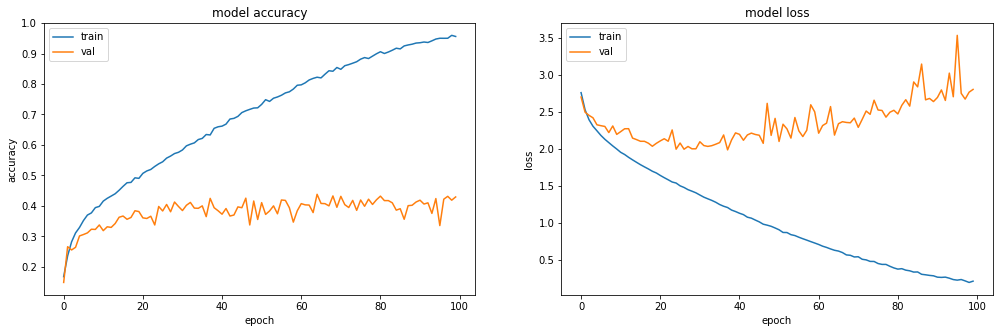

In [ ]:
mlp_sgd = create_model_mlp()
model_creator(mlp_sgd,SGD(),SparseCategoricalCrossentropy(),num_of_epochs=100)

Καλούμε τώρα τη συνάρτηση **model_evaluation** με όρισμα το μοντέλο μας για την αξιολόγησή της απόδοσής του:

In [ ]:
model_evaluation(mlp_sgd)

Test Accuracy = 0.4345000088214874
Test Loss = 2.745664119720459


Παρατηρούμε πως για τα test δεδομένα λαμβάνουμε **ποσοστό ακρίβειας (accuracy)  43,45% καθώς και σφάλμα (loss) ίσο με 2,746**. 

Το test accuracy προσεγγίζει αρκετά αυτό του προηγούμενου μοντέλου (απόκλιση 1%), ωστόσο είναι λίγο υψηλότερο. Βέβαια, μεγαλύτερο είναι και το validation loss. Είναι εμφανές πως και εδώ δεν έχει νόημα να εκπαιδεύσουμε παραπάνω το δίκτυο μας αφού, ήδη μετά από έναν αριθμό εποχών και μετά (μικρότερο του 100), εμφανίζεται έντονα το φαινόμενο της υπερκπαίδευσης (overfitting), με την ακρίβεια επικύρωσης (validation accuracy) να μην βελτιώνεται πέραν του 41-42% (αλλά αντίθετα να κυματώνεται γύρω από αυτές τις τιμές) και με το σφάλμα επικύρωσης (validation loss) να αυξάνει καθώς συνεχίζεται η εκπαίδευση του μοντέλου.

Αξίζει να σημειωθεί ότι και εδώ θα μπορούσαμε να πετύχουμε ελαφρώς καλύτερα αποτελέσματα (μικρότερο loss και ενδεχομένως λίγο μεγαλύτερο accuracy) με μικρότερο αριθμό εποχών, ωστόσο επιλέγουμε τον συγκεκριμένο αριθμό καθώς στο Ερώτημα 2, που θα αντιμετωπίσουμε με διάφορες μεθόδους το πρόβλημα του overfiting, θα κριθεί απαραιτήτος ένας μεγαλύτερος αριθμός εποχών για την βέλτιστη εκπαίδευση του μοντέλου.


#### 2) **Optimizer = Adagrad(), loss = SparseCategoricalCrossentropy(), metric = 'accuracy', epochs = 200** 

Αξιοποιούμε τις συναρτήσεις **create_model_mlp** και **model_creator** για την δημιουργία, μεταγλώττιση και εκπαίδευση του μοντέλου:

Model: "sequential_44"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_44 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dense_106 (Dense)            (None, 512)               1573376   
_________________________________________________________________
dense_107 (Dense)            (None, 200)               102600    
_________________________________________________________________
dense_108 (Dense)            (None, 20)                4020      
Total params: 1,679,996
Trainable params: 1,679,996
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
266/266 [==============================] - 1s 5ms/step - loss: 2.8662 - accuracy: 0.1488 - val_loss: 2.7564 - val_accuracy: 0.2040
Epoch 2/200
266/266 [==============================] - 1s 4ms/step - loss: 2.6840 - accuracy: 0.21

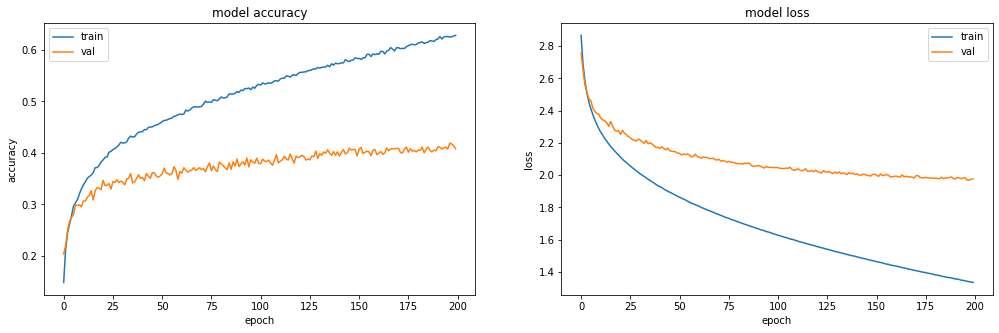

In [ ]:
mlp_adagrad = create_model_mlp()
model_creator(mlp_adagrad,Adagrad(),SparseCategoricalCrossentropy(),num_of_epochs=200)

Καλούμε τώρα τη συνάρτηση **model_evaluation** με όρισμα το μοντέλο μας για την αξιολόγησή της απόδοσής του:

In [ ]:
model_evaluation(mlp_adagrad)

Test Accuracy = 0.41350001096725464
Test Loss = 1.9569456577301025


Παρατηρούμε πως για τα test δεδομένα λαμβάνουμε **ποσοστό ακρίβειας (accuracy)  41,35% καθώς και σφάλμα (loss) ίσο με 1,957**.

Το φαινόμενο της υπερεκπαίδευσης (overfitting) είναι ορατό αφού υπάρχει μια αισθητή απόκλιση μεταξύ των καμπυλών των δεδομένων εκπαίδευσης (train) που απεικονίζονται με μπλε χρώμα και των αντίστοιχων καμπυλών των δεδομένων επικύρωσης (validation) που απεικονίζονται με πορτοκαλί χρώμα. Παρόλα αυτά, μέχρι και το τέλος της εκπαίδευσης του, το μοντέλο φαίνεται να εμφανίζει αυξανόμενο validation accuracy και μειούμενο validation loss, γεγονός επιθυμητό. Όταν η εκπαίδευση πλησιάζει τις 200 εποχές τα 2 μεγέθη τείνουν να σταθεροποιηθούν.

### 3) **LeNet**: CONV(32, 3), RELU, POOL(2), CONV(32,3), RELU, POOL(2), FC(512, RELU, FC(200),SOFTMAX

Το **LeNet**, όπως και τα υπόλοιπα μοντέλα που μελετάμε στη συνέχεια, ανήκουν στην κατηγορία των **Συνελικτικών Νευρωνικών Δικτύων (Convolutional Neural Networks)**, δηλαδή είναι βαθιά νευρωνικά δίκτυα τα οποία ειδικεύονται στην ανάλυση εικόνων. Το συγκεκριμένο δίκτυο διαθέτει 2 συνελικτικά (convolutional) επίπεδα 32 φίλτρων διάστασης 3x3, με συναρτήσεις ενεργοποίησης relu, 2 επίπεδα υποδειγματοληψίας τύπου MaxPooling 2x2 και 3 Fully Connected Layers (με συναρτήσεις ενεργοποίησης relu για τα 2 πρώτα και softmax για το output layer).

In [ ]:
def create_model_lenet(): 
  model_lenet = models.Sequential()
  model_lenet.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3))) 
  model_lenet.add(layers.MaxPooling2D((2, 2)))
  model_lenet.add(layers.Conv2D(32, (3, 3), activation='relu'))
  model_lenet.add(layers.MaxPooling2D((2, 2)))
  model_lenet.add(layers.Flatten())
  model_lenet.add(layers.Dense(512, activation='relu'))
  model_lenet.add(layers.Dense(200, activation='relu'))
  model_lenet.add(layers.Dense(num_of_classes, activation='softmax'))
  return model_lenet

Ένα σχηματικό διάγραμμα της παραπάνω αρχιτεκτονικής φαίνεται στο ακόλουθο σχήμα:

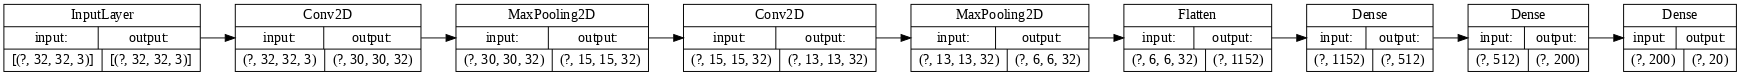

In [ ]:
model_lenet = create_model_lenet()
tf.keras.utils.plot_model(model_lenet, to_file='model.png', show_shapes=True, show_layer_names=False,rankdir='LR', expand_nested=False, dpi=70)

Μετά από διάφορες δοκιμές παραμέτρων **optimizer, loss, metric και epoch** καταλήγουμε στο ότι οι 2 καλύτεροι δυνατοί συνδυασμοί για το μοντέλο **Lenet** (που εξασφαλίζουν το μεγαλύτερο ποσοστό ακρίβειας για το σύνολο των δεδομένων ελέγχου-test accuracy) είναι οι ακόλουθοι:


*   **Optimizer = Adam(), loss = SparseCategoricalCrossentropy(), metric = 'accuracy', epochs = 100** 

*    **Optimizer = Nadam(), loss = SparseCategoricalCrossentropy(), metric = 'accuracy', epochs = 100** 

#### 1) **Optimizer = Adam(), loss = SparseCategoricalCrossentropy(), metric = 'accuracy', epochs = 100** 

Αξιοποιούμε τις συναρτήσεις **create_model_lenet** και **model_creator** για την δημιουργία, μεταγλώτιση και εκπαίδευση του μοντέλου:

Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_44 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 13, 13, 32)        9248      
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_34 (Flatten)         (None, 1152)              0         
_________________________________________________________________
dense_84 (Dense)             (None, 512)               590336    
_________________________________________________________________
dense_85 (Dense)             (None, 200)             

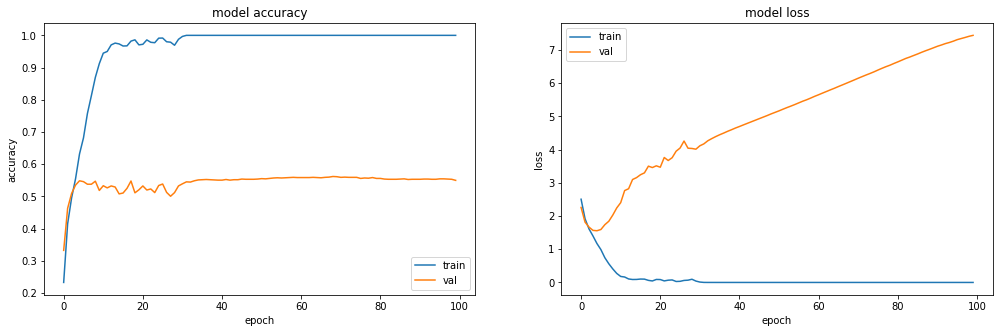

In [ ]:
lenet_adam = create_model_lenet()
model_creator(lenet_adam,Adam(),SparseCategoricalCrossentropy(),num_of_epochs=100)

Καλούμε τώρα τη συνάρτηση **model_evaluation** με όρισμα το μοντέλο μας για την αξιολόγησή της απόδοσής του:

In [ ]:
model_evaluation(lenet_adam)

Test Accuracy = 0.5684999823570251
Test Loss = 6.901246070861816


Παρατηρούμε πως για τα test δεδομένα λαμβάνουμε **ποσοστό ακρίβειας (accuracy)  56,85% καθώς και σφάλμα (loss) ίσο με 6,901**. 

Το ποσοστό ορθής κατηγοριοποίησης φαίνεται πως παρουσιάζει μια σημαντική άνοδο (περίπου 15%) συγκριτικά με τα 2 προηγούμενα μοντέλα, γεγονός αναμενόμενο εφόσον αυξάνεται κατά πολύ η πολυπλοκότητα του μοντέλου μας. Βέβαια, το φαινόμενο του overfitting είναι πολύ έντονο με το validation accuracy να μεγιστοποιείται μετά τις 30 εποχές και το validation loss να αυξάνει σημαντικά καθώς το μοντέλο εκπαιδεύεται περαιτέρω μετά τις 10 εποχές. Επίσης, από πολύ νωρίς φαίνεται ότι το training accuracy φτάνει το 100%, με το μοντέλο να μαθαίνει τέλεια τα δεδομένα εκπαίδευσης αλλά να αδυνατεί να γενικεύσει το ευρύτερο πρόβλημα κατηγοριοποίησης των εικόνων. 

Ο λόγος που και εδώ διατηρούμε μεγάλο τον αριθμό των εποχών (ενώ είναι προφανές ότι θα είχαμε καλύτερα αποτελέσματα για μικρότερο αριθμό εποχών) είναι ότι στο Ερώτημα 2, που θα εισάγουμε τεχνικές αντιμετώπισης της υπερκπαίδευσης (όπως Dropout και Data Augmentation) θα κριθεί αναγκαίος ένας μεγάλος αριθμός εποχών για την βέλτιστη εκπαίδευση του μοντέλου μας.

#### 2) **Optimizer = Nadam(), loss = SparseCategoricalCrossentropy(), metric = 'accuracy', epochs = 100** 

Αξιοποιούμε τις συναρτήσεις **create_model_lenet** και **model_creator** για την δημιουργία, μεταγλώτιση και εκπαίδευση του μοντέλου:

Model: "sequential_50"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_75 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_56 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_76 (Conv2D)           (None, 13, 13, 32)        9248      
_________________________________________________________________
max_pooling2d_57 (MaxPooling (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_50 (Flatten)         (None, 1152)              0         
_________________________________________________________________
dense_120 (Dense)            (None, 512)               590336    
_________________________________________________________________
dense_121 (Dense)            (None, 200)             

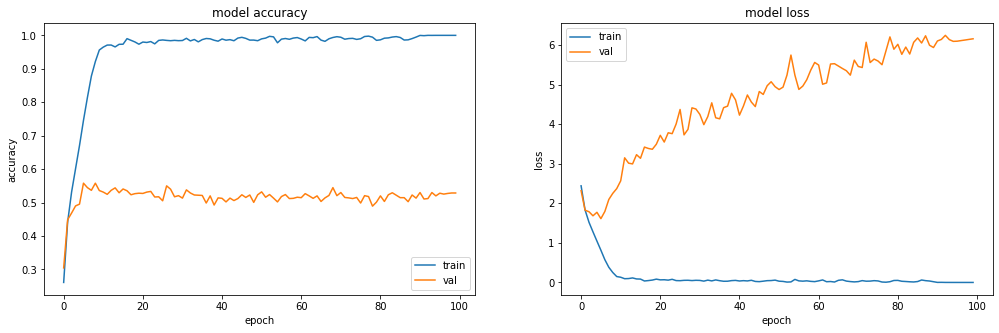

In [ ]:
lenet_nadam = create_model_lenet()
model_creator(lenet_nadam,Nadam(),SparseCategoricalCrossentropy(),num_of_epochs=100)

Καλούμε τώρα τη συνάρτηση **model_evaluation** με όρισμα το μοντέλο μας για την αξιολόγησή της απόδοσής του:

In [ ]:
model_evaluation(lenet_nadam)

Test Accuracy = 0.5400000214576721
Test Loss = 5.8727335929870605


Παρατηρούμε πως για τα test δεδομένα λαμβάνουμε **ποσοστό ακρίβειας (accuracy)  54% καθώς και σφάλμα (loss) ίσο με 5,873**. 

Το συγκεκριμένο μοντέλο φαίνεται να παρουσιάζει μια παρόμοια συμπεριφορά με αυτή του προηγούμενου (με optimizer = Adam), οπότε και τα συμπεράσματα είναι ανάλογα. Έχουμε από αρκετά νωρίς σημαντική αύξηση του validation loss, μεγιστοποίηση του validation accuracy και κορεσμό του training accuracy στο 100%. Έχουμε λίγο μικρότερη ακρίβεια κατηγοριοποίησης αλλά και μικρότερο loss. Ο αριθμός των εποχών μπορεί να μειωθεί και εδώ αν θέλουμε να λάβουμε καλύτερα αποτελέσματα ως προς το valdation loss, ωστόσο αφήνεται ίδιος για λόγους σύγκρισης.

### 4) **CNN1**: CONV(16, 5), RELU, POOL(2), CONV(16,3), RELU, POOL(2), CONV(32, 3), RELU, FC(200), SOFTMAX

Το συγκεκριμένο δίκτυο διαθέτει 3 συνελικτικά (convolutional) επίπεδα, εκ των οποίων το πρώτο είναι 16 φίλτρων διάστασης 5x5, το δέυτερο είναι 16 φίλτρων 3x3 και το τρίτο είναι 32 φίλτρων 3x3. Όλα ενεργοποιούνται μέσω συναρτήσεων relu. Μετά από τα δύο πρώτα Convolutional Layers υπάρχει ένα επίπεδο υποδειγματοληψίας τύπου MaxPooling 2x2 ενώ στο τέλος βρίσκονται 2 Fully Connected επίπεδα, από τα οποία το πρώτο περιλαμβάνει 200 νευρώνες και το δεύτερο και τελευταίο (output layer) περιλαμβάνει πλήθος νευρώνων ίσο με τον αριθμό των εκάστοτε κλάσεων που ορίζουμε. Για το πρωτελευταίο layer επιλέγουμε ως συνάρτηση ενεργοποίησης μια relu ενώ το output layer διαθέτει μια συνάρτηση ενεργοποίησης (activation fucntion) softmax.

In [ ]:
def create_model_cnn1():
  model_cnn1 = models.Sequential()
  model_cnn1.add(layers.Conv2D(16, (5, 5), activation='relu', input_shape=(32, 32, 3))) 
  model_cnn1.add(layers.MaxPooling2D((2, 2)))
  model_cnn1.add(layers.Conv2D(16, (3, 3), activation='relu'))
  model_cnn1.add(layers.MaxPooling2D((2, 2)))
  model_cnn1.add(layers.Conv2D(32, (3, 3), activation='relu'))
  model_cnn1.add(layers.Flatten())
  model_cnn1.add(layers.Dense(200, activation='relu'))
  model_cnn1.add(layers.Dense(num_of_classes, activation='softmax'))
  return model_cnn1

Ένα σχηματικό διάγραμμα της παραπάνω αρχιτεκτονικής φαίνεται στο ακόλουθο σχήμα:

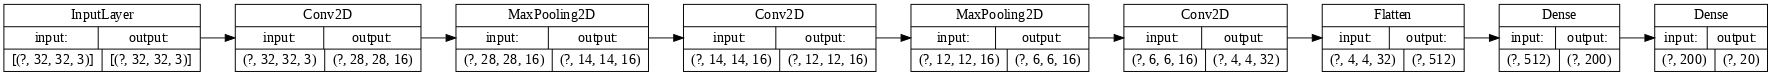

In [ ]:
model_cnn1 = create_model_cnn1()
tf.keras.utils.plot_model(model_cnn1, to_file='model.png', show_shapes=True, show_layer_names=False,rankdir='LR', expand_nested=False, dpi=70)

Μετά από δοκιμές διάφορων παραμετροποιήσεων **optimizer, loss, metric και epoch** καταλήγουμε στο ότι οι 2 καλύτεροι δυνατοί συνδυασμοί για το μοντέλο **CNN1** (που εξασφαλίζουν το μεγαλύτερο ποσοστό ακρίβειας για το σύνολο των δεδομένων ελέγχου-test set) είναι οι ακόλουθοι:


*   **Optimizer = Adam(), loss = SparseCategoricalCrossentropy(), metric = 'accuracy', epochs = 100** 

*    **Optimizer = Nadam(), loss = SparseCategoricalCrossentropy(), metric = 'accuracy', epochs = 100** 

#### 1) **Optimizer = Adam(), loss = SparseCategoricalCrossentropy(), metric = 'accuracy', epochs = 100** 

Αξιοποιούμε τις συναρτήσεις **create_model_cnn1** και **model_creator** για την δημιουργία, μεταγλώτιση και εκπαίδευση του μοντέλου:

Model: "sequential_51"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_77 (Conv2D)           (None, 28, 28, 16)        1216      
_________________________________________________________________
max_pooling2d_58 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_78 (Conv2D)           (None, 12, 12, 16)        2320      
_________________________________________________________________
max_pooling2d_59 (MaxPooling (None, 6, 6, 16)          0         
_________________________________________________________________
conv2d_79 (Conv2D)           (None, 4, 4, 32)          4640      
_________________________________________________________________
flatten_51 (Flatten)         (None, 512)               0         
_________________________________________________________________
dense_123 (Dense)            (None, 200)             

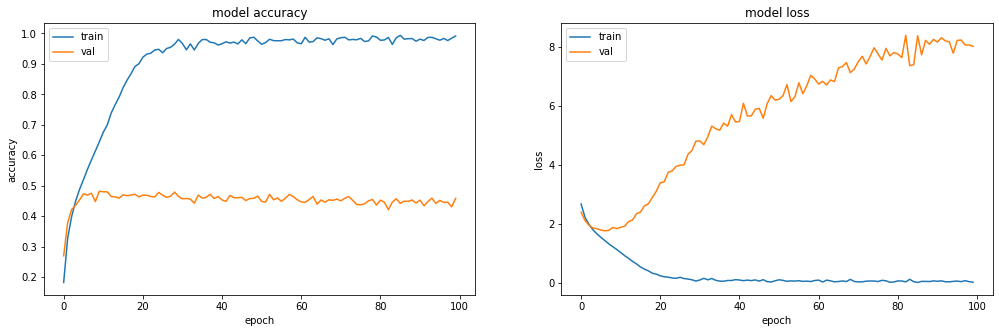

In [ ]:
cnn1_adam = create_model_cnn1()
model_creator(cnn1_adam,Adam(),SparseCategoricalCrossentropy(),num_of_epochs=100)

Καλούμε τώρα τη συνάρτηση **model_evaluation** με όρισμα το μοντέλο μας για την αξιολόγησή της απόδοσής του:

In [ ]:
model_evaluation(cnn1_adam)

Test Accuracy = 0.46050000190734863
Test Loss = 7.840388774871826


Παρατηρούμε πως για τα test δεδομένα λαμβάνουμε **ποσοστό ακρίβειας (accuracy)  46,05% καθώς και σφάλμα (loss) ίσο με 7,84**. 

Το συνελικτικό αυτό δίκτυο φαίνεται να έχει αρκετά κατώτερη απόδοση από αυτή του **Lenet** ενώ χειρότερο είναι και το validation loss του. Ωστόσο, η συμπεριφορά του κατά την εκπαίδευση φαίνεται να είναι παρόμοια με αυτή του **Lenet**. Το φαινόμενο του overfitting είναι και εδώ ιδιαίτερα αισθητό με το validation accuracy να μεγιστοποιείται μετά τις 10 εποχές και το validation loss να αυξάνει σημαντικά καθώς το μοντέλο εκπαιδεύεται περαιτέρω. Επίσης, από πολύ νωρίς φαίνεται ότι το training accuracy φτάνει το 100%, με το μοντέλο να μαθαίνει τέλεια τα train δεδομένα αλλά να διατηρεί σταθερή απόδοση ως προς τα validation δεδομένα.

Ο λόγος που και εδώ διατηρούμε μεγάλο τον αριθμό των εποχών (ενώ είναι προφανές ότι θα είχαμε καλύτερα αποτελέσματα για μικρότερο αριθμό εποχών) είναι ότι στο Ερώτημα 2, που θα εισάγουμε τεχνικές αντιμετώπισης της υπερκπαίδευσης (όπως Dropout και Data Augmentation) θα κριθεί αναγκαίος ένας μεγάλος αριθμός εποχών για την βέλτιστη εκπαίδευση του μοντέλου μας.

#### 2) **Optimizer = Nadam(), loss = SparseCategoricalCrossentropy(), metric = 'accuracy', epochs = 100** 

Αξιοποιούμε τις συναρτήσεις **create_model_cnn1** και **model_creator** για την δημιουργία, μεταγλώτιση και εκπαίδευση του μοντέλου:

Model: "sequential_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_54 (Conv2D)           (None, 28, 28, 16)        1216      
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 12, 12, 16)        2320      
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 6, 6, 16)          0         
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 4, 4, 32)          4640      
_________________________________________________________________
flatten_38 (Flatten)         (None, 512)               0         
_________________________________________________________________
dense_94 (Dense)             (None, 200)             

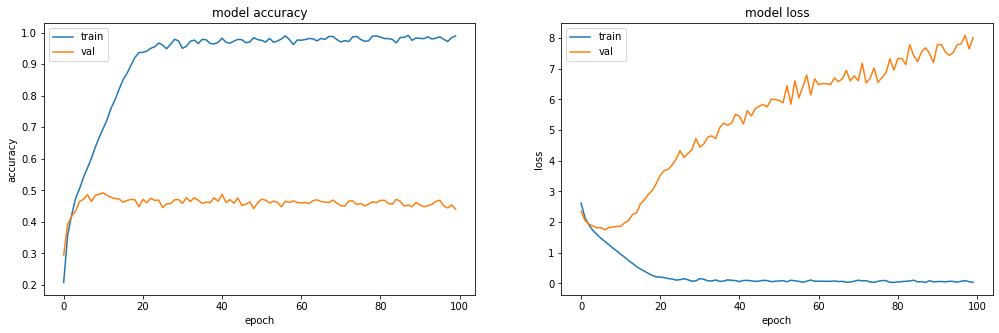

In [ ]:
cnn1_nadam = create_model_cnn1()
model_creator(cnn1_nadam,Nadam(),SparseCategoricalCrossentropy(),num_of_epochs=100)

Καλούμε τώρα τη συνάρτηση **model_evaluation** με όρισμα το μοντέλο μας για την αξιολόγησή της απόδοσής του:

In [ ]:
model_evaluation(cnn1_nadam)

Test Accuracy = 0.4480000138282776
Test Loss = 7.567529201507568


Παρατηρούμε πως για τα test δεδομένα λαμβάνουμε **ποσοστό ακρίβειας (accuracy)  44,8% καθώς και σφάλμα (loss) ίσο με 7,568**. 

Το συγκεκριμένο μοντέλο φαίνεται να παρουσιάζει μια παρόμοια συμπεριφορά με αυτή του προηγούμενου (με optimizer = Adam), οπότε και τα συμπεράσματα είναι ανάλογα. Έχουμε από αρκετά νωρίς σημαντική αύξηση του validation loss, μεγιστοποίηση του validation accuracy και κορεσμό του training accuracy στο 100%. Έχουμε λίγο μικρότερη ακρίβεια κατηγοριοποίησης αλλά και λίγο μικρότερο loss. Ο αριθμός των εποχών μπορεί να μειωθεί και εδώ αν θέλουμε να λάβουμε καλύτερα αποτελέσματα ως προς το valdation loss, ωστόσο αφήνεται ίδιος για λόγους σύγκρισης.

### 5) **CNN2**: Δικό μας μοντέλο

Το μοντέλο που επιλέγουμε να κατασκευάσουμε διαθέτει 3 συνελικτικά (convolutional) επίπεδα, εκ των οποίων το πρώτο είναι 16 φίλτρων διάστασης 3x3, το δεύτερο είναι 64 φίλτρων 3x3 και το τρίτο είναι 128 φίτλρων 3x3. Και τα 3 ενεργοποιούνται μέσω συναρτήσεων relu. Μετά από τα δύο πρώτα συνελικτικά επίπεδα υπάρχει ένα επίπεδο υποδειγματοληψίας τύπου MaxPooling 2x2 ενώ μετά το τρίτο Convolutinal Layer βρίσκεται ένα επίπεδο υποδειγματοληψίας τύπου Average Pooling 2x2. Στο τέλος βρίσκονται 2 Fully Connected επίπεδα, από τα οποία το πρώτο περιλαμβάνει 1024 νευρώνες και το δεύτερο και τελευταίο (output layer) περιλαμβάνει πλήθος νευρώνων ίσο με τον αριθμό των εκάστοτε κλάσεων που ορίζουμε. Για το πρωτελευταίο layer επιλέγουμε ως συνάρτηση ενεργοποίησης μια relu ενώ το output layer διαθέτει μια συνάρτηση ενεργοποίησης (activation fucntion) softmax.

In [ ]:
def create_model_cnn2():
  model_cnn2 = models.Sequential()
  model_cnn2.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3))) 
  model_cnn2.add(layers.MaxPooling2D((2, 2)))
  model_cnn2.add(layers.Conv2D(64, (3, 3), activation='relu'))
  model_cnn2.add(layers.MaxPooling2D((2, 2)))
  model_cnn2.add(layers.Conv2D(128, (3, 3), activation='relu'))
  model_cnn2.add(layers.AveragePooling2D((2, 2)))
  model_cnn2.add(layers.Flatten())
  model_cnn2.add(layers.Dense(1024,activation='relu'))
  model_cnn2.add(layers.Dense(num_of_classes,activation='softmax'))
  return model_cnn2

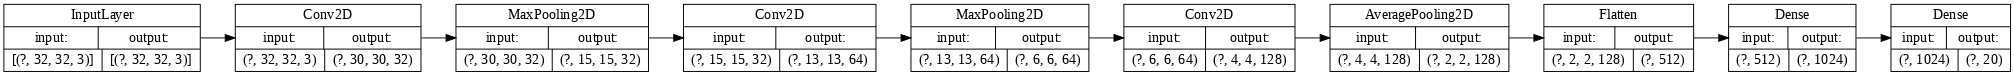

In [ ]:
model_cnn2 = create_model_cnn2()
tf.keras.utils.plot_model(model_cnn2, to_file='model.png', show_shapes=True, show_layer_names=False,rankdir='LR', expand_nested=False, dpi=70)

Μετά από δοκιμές διάφορων παραμετροποιήσεων **optimizer, loss, metric και epoch** καταλήγουμε στο ότι οι 2 καλύτεροι δυνατοί συνδυασμοί για το μοντέλο **CNN2** (που εξασφαλίζουν το μεγαλύτερο ποσοστό ακρίβειας για το σύνολο των δεδομένων ελέγχου-test set) είναι οι ακόλουθοι:


*   **Optimizer = Adam(), loss = SparseCategoricalCrossentropy(), metric = 'accuracy', epochs = 100** 

*    **Optimizer = Nadam(), loss = SparseCategoricalCrossentropy(), metric = 'accuracy', epochs = 100** 

#### 1) **Optimizer = Adam(), loss = SparseCategoricalCrossentropy(), metric = 'accuracy', epochs = 100** 

Αξιοποιούμε τις συναρτήσεις **create_model_cnn2** και **model_creator** για την δημιουργία, μεταγλώτιση και εκπαίδευση του μοντέλου:

Model: "sequential_48"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_69 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_52 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_70 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_53 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_71 (Conv2D)           (None, 4, 4, 128)         73856     
_________________________________________________________________
average_pooling2d_9 (Average (None, 2, 2, 128)         0         
_________________________________________________________________
flatten_48 (Flatten)         (None, 512)             

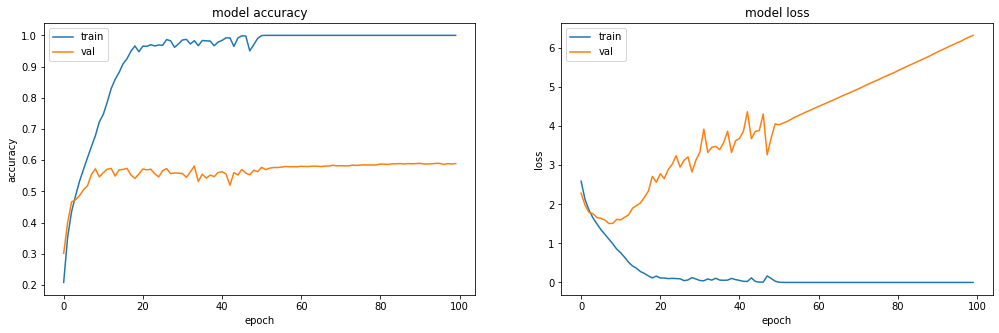

In [ ]:
cnn2_adam = create_model_cnn2()
model_creator(cnn2_adam,Adam(),SparseCategoricalCrossentropy(),num_of_epochs=100)

Καλούμε τώρα τη συνάρτηση **model_evaluation** με όρισμα το μοντέλο μας για την αξιολόγησή της απόδοσής του:

In [ ]:
model_evaluation(cnn2_adam)

Test Accuracy = 0.612500011920929
Test Loss = 5.413550853729248


Παρατηρούμε πως για τα test δεδομένα λαμβάνουμε **ποσοστό ακρίβειας (accuracy)  61,25% καθώς και σφάλμα (loss) ίσο με 5,413**. 

Το CNN αυτό φαίνεται να έχει την **καλύτερη ακρίβεια κατηγοριοποίησης** σε σχέση με όλα τα προηγούμενα που εξετάστηκαν. Η συμπεριφορά του μοντέλου κατά την εκπαίδευση είναι αντίστοιχη αυτής που αναλύθηκε στα δύο προηγούμενα μοντέλα. Δηλαδή παρατηρούμε ότι το validation accuracy μεγιστοποιείται μετά τις 10 πρώτες εποχές και το validation loss αυξάνεται σημαντικά καθώς το μοντέλο εκπαιδεύεται περαιτέρω. Επίσης, από πολύ νωρίς φαίνεται ότι το training accuracy φτάνει το 100%, με το μοντέλο να μαθαίνει τέλεια τα train δεδομένα αλλά να διατηρεί σταθερή απόδοση ως προς τα validation δεδομένα.


#### 2) **Optimizer = Nadam(), loss = SparseCategoricalCrossentropy(), metric = 'accuracy', epochs = 100** 

Αξιοποιούμε τις συναρτήσεις **create_model_cnn2** και **model_creator** για την δημιουργία, μεταγλώτιση και εκπαίδευση του μοντέλου:

Model: "sequential_49"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_72 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_54 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_73 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_55 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_74 (Conv2D)           (None, 4, 4, 128)         73856     
_________________________________________________________________
average_pooling2d_10 (Averag (None, 2, 2, 128)         0         
_________________________________________________________________
flatten_49 (Flatten)         (None, 512)             

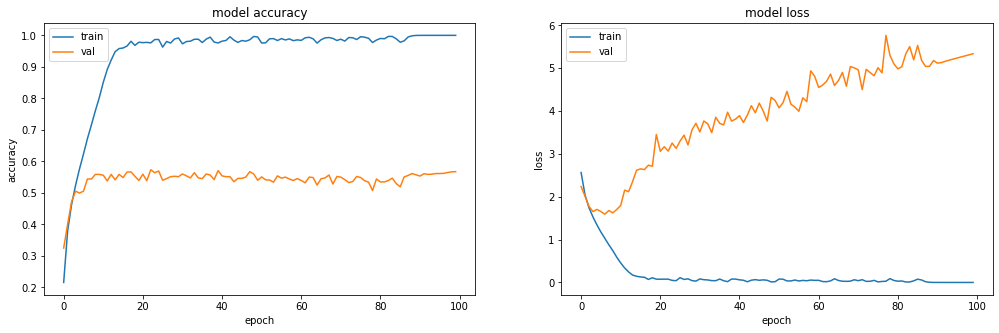

In [ ]:
cnn2_nadam = create_model_cnn2()
model_creator(cnn2_nadam,Nadam(),SparseCategoricalCrossentropy(),num_of_epochs=100)

Καλούμε τώρα τη συνάρτηση **model_evaluation** με όρισμα το μοντέλο μας για την αξιολόγησή της απόδοσής του:

In [ ]:
model_evaluation(cnn2_nadam)

Test Accuracy = 0.5799999833106995
Test Loss = 4.919820785522461


Παρατηρούμε πως για τα test δεδομένα λαμβάνουμε **ποσοστό ακρίβειας (accuracy)  58% καθώς και σφάλμα (loss) ίσο με 4,92**. 

Το συγκεκριμένο μοντέλο φαίνεται να παρουσιάζει μια παρόμοια συμπεριφορά με αυτή του προηγούμενου (με optimizer = Adam), οπότε και τα συμπεράσματα είναι ανάλογα. Έχουμε από αρκετά νωρίς σημαντική αύξηση του validation loss, μεγιστοποίηση του validation accuracy και κορεσμό του training accuracy στο 100%. Έχουμε λίγο μικρότερη ακρίβεια κατηγοριοποίησης αλλά και λίγο μικρότερο loss. Ο αριθμός των εποχών μπορεί να μειωθεί και εδώ αν θέλουμε να λάβουμε καλύτερα αποτελέσματα ως προς το valdation loss, ωστόσο αφήνεται ίδιος για λόγους σύγκρισης.

# **Επιλογή καλύτερων συνδυασμών optimizer, loss, metric και epoch**

$\begin{array}{|C{6cm}||C{6cm} |C{7cm}|} 
    \hline
    \textbf{Model} & \textbf{Optimizer1} & \textbf{Optimizer2} 
    \\\hline
    \textbf{Softmax} & \textbf{SGD: 42.5} \% &  ADAGRAD: 39.5 \% 
    \\\hline
    \textbf{Mlp} & \textbf{SGD: 43.45} \% & ADAGRAD: 41.35 \%
    \\\hline
    \textbf{LeNet} &  \textbf{ADAM: 56.85} \% & NADAM: 54 \%
    \\\hline
    \textbf{Cnn1} &  \textbf{ADAM: 46.05} \% & NADAM: 44.8 \%
    \\\hline
    \textbf{Cnn2} & \textbf{ADAM: 61.25} \% & NADAM: 58 \%
    \\\hline
\end{array}$

Με βάση τα ποσοστά ακρίβειας που λαμβάνουμε για το test set, όπως αυτά φαίνονται στον παραπάνω πίνακα, καταλήγουμε στους εξής καλύτερους συνδυασμούς optimizer, loss, metric και epoch για το κάθε μοντέλο:

* **Softmax (baseline):** Optimizer = SGD(), loss = SparseCategoricalCrossentropy(), metric = 'accuracy', epochs = 100 

* **MLP:** Optimizer = SGD(), loss = SparseCategoricalCrossentropy(), metric = 'accuracy', epochs = 100

* **Lenet:** Optimizer = adam(), loss = SparseCategoricalCrossentropy(), metric = 'accuracy', epochs = 100

* **Cnn1:** Optimizer = adam(), loss = SparseCategoricalCrossentropy(), metric = 'accuracy', epochs = 100

* **Cnn2:** Optimizer = adam(), loss = SparseCategoricalCrossentropy(), metric = 'accuracy', epochs = 100



## **Διαγράμματα καλύτερων συνδυασμών για κάθε μοντέλο**

Για κάθε ένα από τα μοντέλα με την καλύτερη ακρίβεια που καταλήξαμε (συνολικά 5), απεικονίζουμε σε κοινό διάγραμμα την ακρίβεια εκπαίδευσης και την ακρίβεια επικύρωσης στο σύνολο των εποχών. 

In [ ]:
history = {k: [] for k in ["softmax","mlp","lenet","cnn1","cnn2"]}

In [ ]:
def model_creator(model_name,model,opt,loss_function,num_of_epochs,metric_score='accuracy'):

  # Model summary
  model.summary()
  
  # Compile model
  model.compile(optimizer=opt,
              loss=loss_function,
              metrics=[metric_score])
      
  # Train model
  history[model_name] = model.fit(x_train, y_train_new,batch_size = 32, epochs=num_of_epochs, validation_data=(x_val,y_val_new))

### 1) **Softmax (baseline)**: FC(200), SOFTMAX

**Optimizer = SGD(), loss = SparseCategoricalCrossentropy(), metric = 'accuracy', epochs = 100** 

In [ ]:
softmax_sgd = create_model_softmax()
model_creator("softmax",softmax_sgd,SGD(),SparseCategoricalCrossentropy(),num_of_epochs=100)

Model: "sequential_104"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_104 (Flatten)        (None, 3072)              0         
_________________________________________________________________
dense_249 (Dense)            (None, 200)               614600    
_________________________________________________________________
dense_250 (Dense)            (None, 20)                4020      
Total params: 618,620
Trainable params: 618,620
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
266/266 [==============================] - 1s 4ms/step - loss: 2.7630 - accuracy: 0.1621 - val_loss: 2.6317 - val_accuracy: 0.2033
Epoch 2/100
266/266 [==============================] - 1s 4ms/step - loss: 2.5372 - accuracy: 0.2441 - val_loss: 2.5523 - val_accuracy: 0.2247
Epoch 3/100
266/266 [==============================] - 1s 5ms/step - loss: 2.4293 - accura

### 2) **MLP**: FC(512), RELU, FC(200), SOFTMAX

**Optimizer = SGD(), loss = SparseCategoricalCrossentropy(), metric = 'accuracy', epochs = 100** 

In [ ]:
mlp_sgd = create_model_mlp()
model_creator("mlp",mlp_sgd,SGD(),SparseCategoricalCrossentropy(),num_of_epochs=100)

Model: "sequential_105"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_105 (Flatten)        (None, 3072)              0         
_________________________________________________________________
dense_251 (Dense)            (None, 512)               1573376   
_________________________________________________________________
dense_252 (Dense)            (None, 200)               102600    
_________________________________________________________________
dense_253 (Dense)            (None, 20)                4020      
Total params: 1,679,996
Trainable params: 1,679,996
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
266/266 [==============================] - 1s 4ms/step - loss: 2.7672 - accuracy: 0.1673 - val_loss: 2.6139 - val_accuracy: 0.2093
Epoch 2/100
266/266 [==============================] - 1s 4ms/step - loss: 2.5198 - accuracy: 0.2

### 3) **LeNet**: CONV(32, 3), RELU, POOL(2), CONV(32,3), RELU, POOL(2), FC(512, RELU, FC(200),SOFTMAX

**Optimizer = Adam(), loss = SparseCategoricalCrossentropy(), metric = 'accuracy', epochs = 100** 

In [ ]:
lenet_adam = create_model_lenet()
model_creator("lenet",lenet_adam,Adam(),SparseCategoricalCrossentropy(),num_of_epochs=100)

Model: "sequential_106"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_152 (Conv2D)          (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_114 (MaxPoolin (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_153 (Conv2D)          (None, 13, 13, 32)        9248      
_________________________________________________________________
max_pooling2d_115 (MaxPoolin (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_106 (Flatten)        (None, 1152)              0         
_________________________________________________________________
dense_254 (Dense)            (None, 512)               590336    
_________________________________________________________________
dense_255 (Dense)            (None, 200)            

### 4) **CNN1**: CONV(16, 5), RELU, POOL(2), CONV(16,3), RELU, POOL(2), CONV(32, 3), RELU, FC(200), SOFTMAX

**Optimizer = Adam(), loss = SparseCategoricalCrossentropy(), metric = 'accuracy', epochs = 100**

In [ ]:
cnn1_adam = create_model_cnn1()
model_creator("cnn1",cnn1_adam,Adam(),SparseCategoricalCrossentropy(),num_of_epochs=100)

Model: "sequential_107"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_154 (Conv2D)          (None, 28, 28, 16)        1216      
_________________________________________________________________
max_pooling2d_116 (MaxPoolin (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_155 (Conv2D)          (None, 12, 12, 16)        2320      
_________________________________________________________________
max_pooling2d_117 (MaxPoolin (None, 6, 6, 16)          0         
_________________________________________________________________
conv2d_156 (Conv2D)          (None, 4, 4, 32)          4640      
_________________________________________________________________
flatten_107 (Flatten)        (None, 512)               0         
_________________________________________________________________
dense_257 (Dense)            (None, 200)            

### 5) **CNN2**: Δικό μας μοντέλο

**Optimizer = Adam(), loss = SparseCategoricalCrossentropy(), metric = 'accuracy', epochs = 100**

In [ ]:
cnn2_adam = create_model_cnn2()
model_creator("cnn2",cnn2_adam,Adam(),SparseCategoricalCrossentropy(),num_of_epochs=100)

Model: "sequential_108"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_157 (Conv2D)          (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_118 (MaxPoolin (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_158 (Conv2D)          (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_119 (MaxPoolin (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_159 (Conv2D)          (None, 4, 4, 128)         73856     
_________________________________________________________________
average_pooling2d_20 (Averag (None, 2, 2, 128)         0         
_________________________________________________________________
flatten_108 (Flatten)        (None, 512)            

Αφού εκπαιδεύσουμε τα 5 καλύτερα μοντέλα απεικονίζουμε σε δύο διαγράμματα την ακρίβεια εκπαίδευσης και την ακρίβεια επικύρωσης για τα μοντέλα στο σύνολο όλων των εποχών.

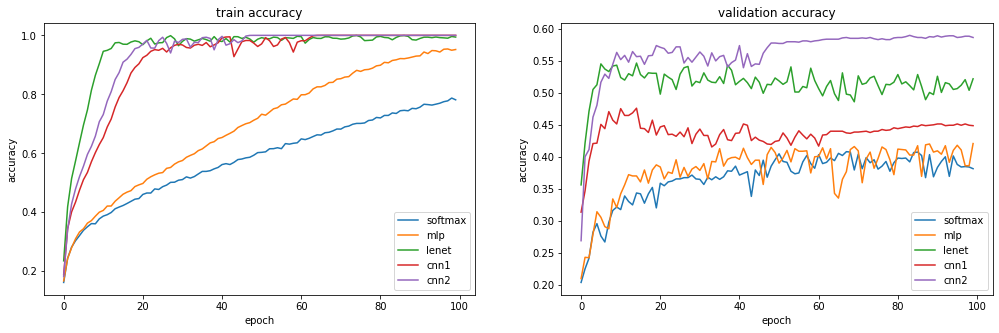

In [ ]:
fig, ax = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(17)

models = ["softmax","mlp","lenet","cnn1","cnn2"]

for model in models:
  hist = history[model]

  # Plot accuracy
  ax[0].plot(hist.history['accuracy'], label=model)
  ax[0].set_title('train accuracy')
  ax[0].set_ylabel('accuracy')
  ax[0].set_xlabel('epoch')
  ax[0].legend(loc='best')

  # Plot loss
  ax[1].plot(hist.history['val_accuracy'], label=model)
  ax[1].set_title('validation accuracy')
  ax[1].set_ylabel('accuracy')
  ax[1].set_xlabel('epoch')
  ax[1].legend(loc='best')

Τα πιο ποιοτικά συμπεράσματα για την απόδοση των μοντέλων εξάγονται από το παραπάνω δεξιά διάγραμμα που απεικονίζει την ακρίβεια επικύρωσης (validation accuracy) των 5 μοντέλων πάνω στο σύνολο όλων των εποχών. Σύμφωνα με αυτό, διαπιστώνουμε πως **το μοντέλο που εμείς κατασκευάσαμε (cnn2) έχει την υψηλότερη ακρίβεια κατηγοριοποίησης, περίπου 60%**. Ακολουθεί το μοντέλο lenet με ποσοστό κοντά στο το 55% ενώ τρίτο έρχεται το cnn1 με ποσοστό που κυμαίνεται γύρω από το 45%. Τελευταία, βρίσκονται,όπως ήταν αναμενόμενο, τα δύο απλά νευρωνικά δίκτυα (Softmax και MLP) που αποτελούνται μόνο από Fully Connected επίπεδα και δεν διαθέτουν καθόλου συνελικτικά επίπεδα ή επίπεδα υποδειγματοληψίας. Και τα δύο αγγίζουν ακρίβεια γύρω στο 40%.

# **Επίδραση της απόδοσης με μεταβολή αριθμού κλάσεων,optimizer και batch size**

Έχοντας πλέον καταλήξει στους καλύτερους συνδυασμούς για κάθε μοντέλο (5 συνολικά) εξετάζουμε για κάθε μοντέλο τα εξής:

* Επίδραση του πλήθους των δεδομένων/κλάσεων στην απόδοση του μοντέλου
* Επίδραση του αλγόριθμου βελτιστοποίησης (optimizer)
* Επίδραση του μεγέθους δέσμης (batch size)


# **Επίδραση της απόδοσης με μεταβολή του αριθμού των κλάσεων**

Αυξάνουμε διαδοχικά τον αριθμό των κλάσεων (και αντίστοιχα και τα δεδομένα μας) από 20 σε 40,60 και τέλος 80 ώστε να δούμε πως η αύξηση αυτή επηρεάζει την ακρίβεια του μοντέλου (test accuracy).

## **Αριθμός κλάσεων = 40**

In [ ]:
# Number of classes
num_of_classes = 40

### 1) **Softmax (baseline)**: FC(200), SOFTMAX

**Optimizer = SGD(), loss = SparseCategoricalCrossentropy(), metric = 'accuracy', epochs = 100** 

Model: "sequential_54"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_54 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dense_130 (Dense)            (None, 200)               614600    
_________________________________________________________________
dense_131 (Dense)            (None, 40)                8040      
Total params: 622,640
Trainable params: 622,640
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
532/532 [==============================] - 2s 4ms/step - loss: 3.3801 - accuracy: 0.1114 - val_loss: 3.2114 - val_accuracy: 0.1240
Epoch 2/100
532/532 [==============================] - 2s 4ms/step - loss: 3.0514 - accuracy: 0.1738 - val_loss: 3.0546 - val_accuracy: 0.1550
Epoch 3/100
532/532 [==============================] - 2s 4ms/step - loss: 2.9095 - accurac

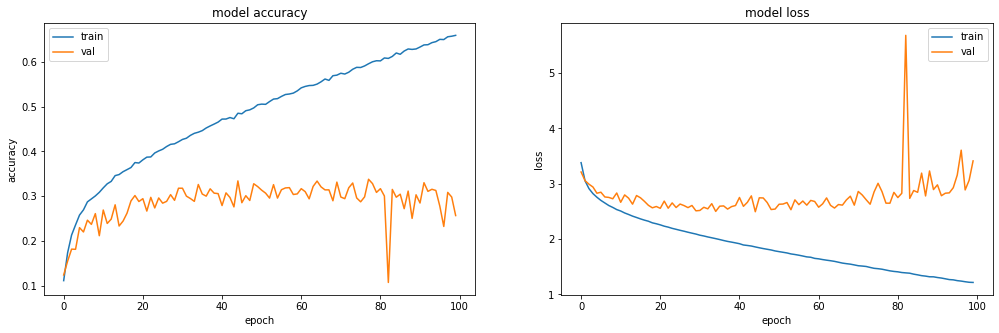

In [ ]:
softmax_sgd = create_model_softmax()
model_creator(softmax_sgd,SGD(),SparseCategoricalCrossentropy(),num_of_epochs=100)

In [ ]:
model_evaluation(softmax_sgd)

Test Accuracy = 0.2542499899864197
Test Loss = 3.418649196624756


### 2) **MLP**: FC(512), RELU, FC(200), SOFTMAX

**Optimizer = SGD(), loss = SparseCategoricalCrossentropy(), metric = 'accuracy', epochs = 100** 

Model: "sequential_55"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_55 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dense_132 (Dense)            (None, 512)               1573376   
_________________________________________________________________
dense_133 (Dense)            (None, 200)               102600    
_________________________________________________________________
dense_134 (Dense)            (None, 40)                8040      
Total params: 1,684,016
Trainable params: 1,684,016
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
532/532 [==============================] - 2s 4ms/step - loss: 3.3579 - accuracy: 0.1143 - val_loss: 3.1926 - val_accuracy: 0.1243
Epoch 2/100
532/532 [==============================] - 2s 4ms/step - loss: 3.0089 - accuracy: 0.19

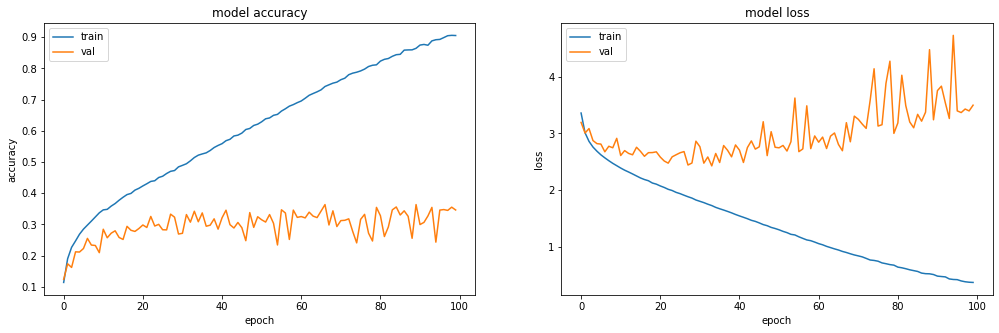

In [ ]:
mlp_sgd = create_model_mlp()
model_creator(mlp_sgd,SGD(),SparseCategoricalCrossentropy(),num_of_epochs=100)

In [ ]:
model_evaluation(mlp_sgd)

Test Accuracy = 0.3434999883174896
Test Loss = 3.514261484146118


### 3) **LeNet**: CONV(32, 3), RELU, POOL(2), CONV(32,3), RELU, POOL(2), FC(512, RELU, FC(200),SOFTMAX

**Optimizer = Adam(), loss = SparseCategoricalCrossentropy(), metric = 'accuracy', epochs = 100** 

Model: "sequential_56"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_80 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_60 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_81 (Conv2D)           (None, 13, 13, 32)        9248      
_________________________________________________________________
max_pooling2d_61 (MaxPooling (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_56 (Flatten)         (None, 1152)              0         
_________________________________________________________________
dense_135 (Dense)            (None, 512)               590336    
_________________________________________________________________
dense_136 (Dense)            (None, 200)             

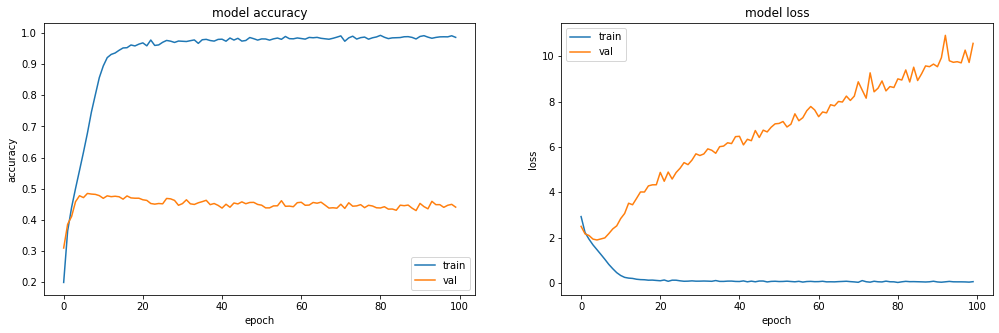

In [ ]:
lenet_adam = create_model_lenet()
model_creator(lenet_adam,Adam(),SparseCategoricalCrossentropy(),num_of_epochs=100)

In [ ]:
model_evaluation(lenet_adam)

Test Accuracy = 0.4359999895095825
Test Loss = 10.814886093139648


### 4) **CNN1**: CONV(16, 5), RELU, POOL(2), CONV(16,3), RELU, POOL(2), CONV(32, 3), RELU, FC(200), SOFTMAX

**Optimizer = Adam(), loss = SparseCategoricalCrossentropy(), metric = 'accuracy', epochs = 100**

Model: "sequential_57"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_82 (Conv2D)           (None, 28, 28, 16)        1216      
_________________________________________________________________
max_pooling2d_62 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_83 (Conv2D)           (None, 12, 12, 16)        2320      
_________________________________________________________________
max_pooling2d_63 (MaxPooling (None, 6, 6, 16)          0         
_________________________________________________________________
conv2d_84 (Conv2D)           (None, 4, 4, 32)          4640      
_________________________________________________________________
flatten_57 (Flatten)         (None, 512)               0         
_________________________________________________________________
dense_138 (Dense)            (None, 200)             

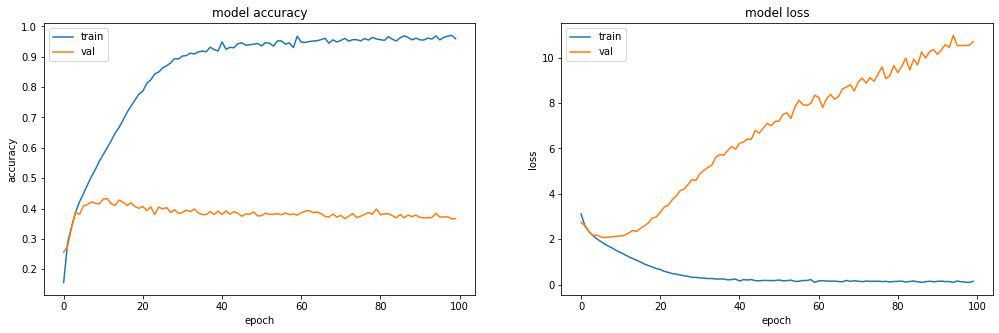

In [ ]:
cnn1_adam = create_model_cnn1()
model_creator(cnn1_adam,Adam(),SparseCategoricalCrossentropy(),num_of_epochs=100)

In [ ]:
model_evaluation(cnn1_adam)

Test Accuracy = 0.359499990940094
Test Loss = 11.16430950164795


### 5) **CNN2**: Δικό μας μοντέλο

**Optimizer = Adam(), loss = SparseCategoricalCrossentropy(), metric = 'accuracy', epochs = 100**

Model: "sequential_58"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_85 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_64 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_86 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_65 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_87 (Conv2D)           (None, 4, 4, 128)         73856     
_________________________________________________________________
average_pooling2d_11 (Averag (None, 2, 2, 128)         0         
_________________________________________________________________
flatten_58 (Flatten)         (None, 512)             

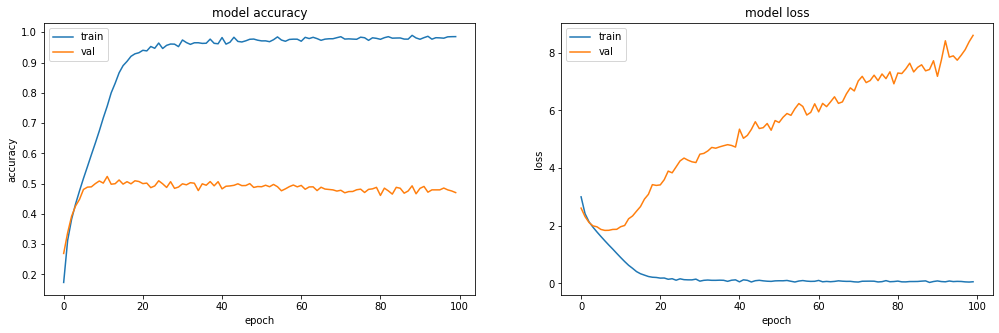

In [ ]:
cnn2_adam = create_model_cnn2()
model_creator(cnn2_adam,Adam(),SparseCategoricalCrossentropy(),num_of_epochs=100)

In [ ]:
model_evaluation(cnn2_adam)

Test Accuracy = 0.4792500138282776
Test Loss = 8.435354232788086


## **Αριθμός κλάσεων = 60**

In [ ]:
# Number of classes
num_of_classes = 60

### 1) **Softmax (baseline)**: FC(200), SOFTMAX

**Optimizer = SGD(), loss = SparseCategoricalCrossentropy(), metric = 'accuracy', epochs = 100** 

Model: "sequential_60"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_60 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dense_144 (Dense)            (None, 200)               614600    
_________________________________________________________________
dense_145 (Dense)            (None, 60)                12060     
Total params: 626,660
Trainable params: 626,660
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
797/797 [==============================] - 3s 4ms/step - loss: 3.8759 - accuracy: 0.0709 - val_loss: 3.6796 - val_accuracy: 0.1118
Epoch 2/100
797/797 [==============================] - 3s 4ms/step - loss: 3.5772 - accuracy: 0.1275 - val_loss: 3.5043 - val_accuracy: 0.1393
Epoch 3/100
797/797 [==============================] - 3s 4ms/step - loss: 3.4360 - accurac

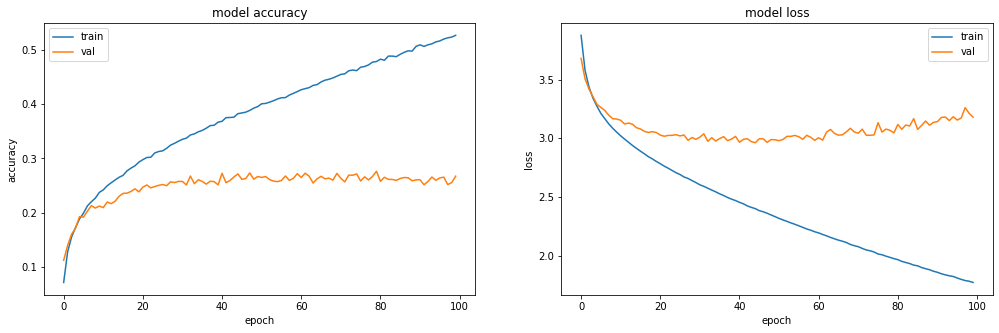

In [ ]:
softmax_sgd = create_model_softmax()
model_creator(softmax_sgd,SGD(),SparseCategoricalCrossentropy(),num_of_epochs=100)

In [ ]:
model_evaluation(softmax_sgd)

Test Accuracy = 0.2644999921321869
Test Loss = 3.1859374046325684


### 2) **MLP**: FC(512), RELU, FC(200), SOFTMAX

**Optimizer = SGD(), loss = SparseCategoricalCrossentropy(), metric = 'accuracy', epochs = 100** 

Model: "sequential_61"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_61 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dense_146 (Dense)            (None, 512)               1573376   
_________________________________________________________________
dense_147 (Dense)            (None, 200)               102600    
_________________________________________________________________
dense_148 (Dense)            (None, 60)                12060     
Total params: 1,688,036
Trainable params: 1,688,036
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
797/797 [==============================] - 4s 4ms/step - loss: 3.8220 - accuracy: 0.0804 - val_loss: 3.6169 - val_accuracy: 0.1222
Epoch 2/100
797/797 [==============================] - 4s 5ms/step - loss: 3.5066 - accuracy: 0.13

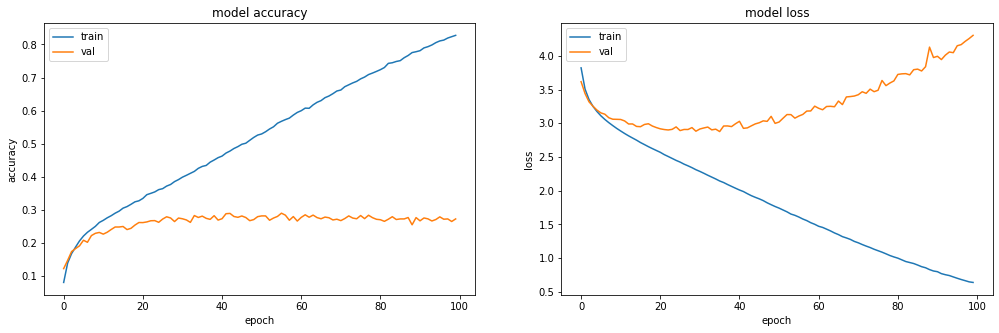

In [ ]:
mlp_sgd = create_model_mlp()
model_creator(mlp_sgd,SGD(),SparseCategoricalCrossentropy(),num_of_epochs=100)

In [ ]:
model_evaluation(mlp_sgd)

Test Accuracy = 0.27950000762939453
Test Loss = 4.211608409881592


### 3) **LeNet**: CONV(32, 3), RELU, POOL(2), CONV(32,3), RELU, POOL(2), FC(512, RELU, FC(200),SOFTMAX

**Optimizer = Adam(), loss = SparseCategoricalCrossentropy(), metric = 'accuracy', epochs = 100** 

Model: "sequential_62"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_88 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_66 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_89 (Conv2D)           (None, 13, 13, 32)        9248      
_________________________________________________________________
max_pooling2d_67 (MaxPooling (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_62 (Flatten)         (None, 1152)              0         
_________________________________________________________________
dense_149 (Dense)            (None, 512)               590336    
_________________________________________________________________
dense_150 (Dense)            (None, 200)             

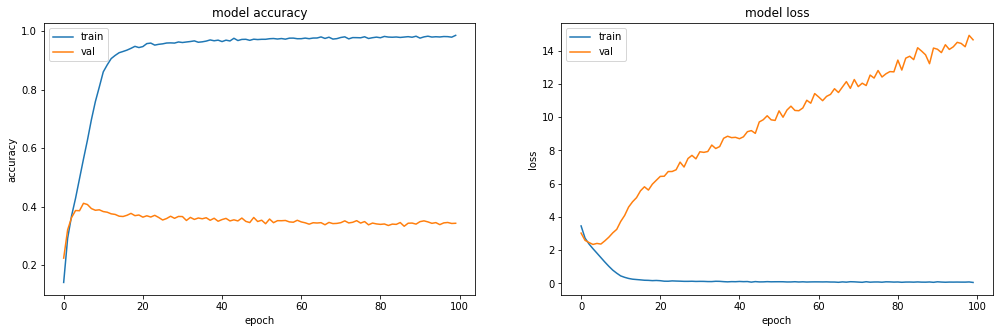

In [ ]:
lenet_adam = create_model_lenet()
model_creator(lenet_adam,Adam(),SparseCategoricalCrossentropy(),num_of_epochs=100)

In [ ]:
model_evaluation(lenet_adam)

Test Accuracy = 0.3434999883174896
Test Loss = 14.174893379211426


### 4) **CNN1**: CONV(16, 5), RELU, POOL(2), CONV(16,3), RELU, POOL(2), CONV(32, 3), RELU, FC(200), SOFTMAX

**Optimizer = Adam(), loss = SparseCategoricalCrossentropy(), metric = 'accuracy', epochs = 100**

Model: "sequential_63"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_90 (Conv2D)           (None, 28, 28, 16)        1216      
_________________________________________________________________
max_pooling2d_68 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_91 (Conv2D)           (None, 12, 12, 16)        2320      
_________________________________________________________________
max_pooling2d_69 (MaxPooling (None, 6, 6, 16)          0         
_________________________________________________________________
conv2d_92 (Conv2D)           (None, 4, 4, 32)          4640      
_________________________________________________________________
flatten_63 (Flatten)         (None, 512)               0         
_________________________________________________________________
dense_152 (Dense)            (None, 200)             

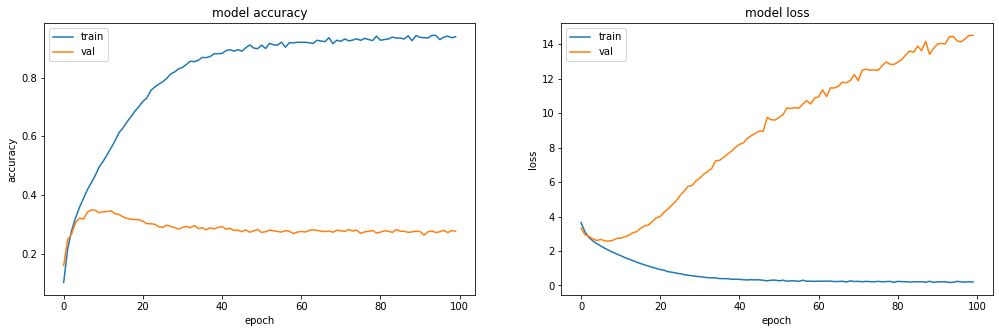

In [ ]:
cnn1_adam = create_model_cnn1()
model_creator(cnn1_adam,Adam(),SparseCategoricalCrossentropy(),num_of_epochs=100)

In [ ]:
model_evaluation(cnn1_adam)

Test Accuracy = 0.27666667103767395
Test Loss = 14.611006736755371


### 5) **CNN2**: Δικό μας μοντέλο

**Optimizer = Adam(), loss = SparseCategoricalCrossentropy(), metric = 'accuracy', epochs = 100**

Model: "sequential_64"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_93 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_70 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_94 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_71 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_95 (Conv2D)           (None, 4, 4, 128)         73856     
_________________________________________________________________
average_pooling2d_12 (Averag (None, 2, 2, 128)         0         
_________________________________________________________________
flatten_64 (Flatten)         (None, 512)             

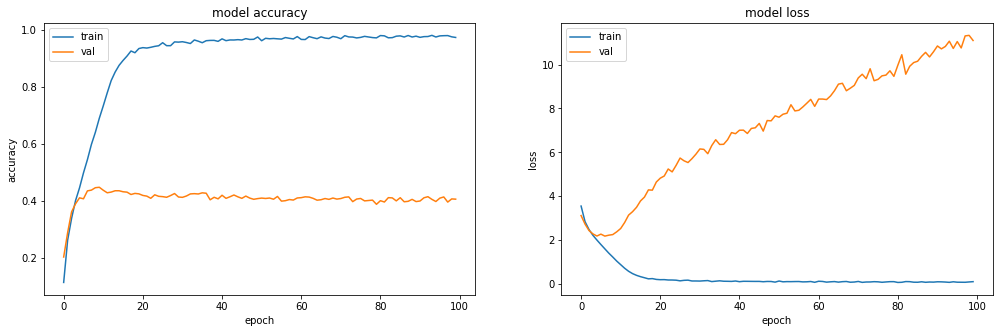

In [ ]:
cnn2_adam = create_model_cnn2()
model_creator(cnn2_adam,Adam(),SparseCategoricalCrossentropy(),num_of_epochs=100)

In [ ]:
model_evaluation(cnn2_adam)

Test Accuracy = 0.4050000011920929
Test Loss = 10.67955493927002


## **Αριθμός κλάσεων = 80**

In [ ]:
# Number of classes
num_of_classes = 80

### 1) **Softmax (baseline)**: FC(200), SOFTMAX

**Optimizer = SGD(), loss = SparseCategoricalCrossentropy(), metric = 'accuracy', epochs = 100** 

Model: "sequential_68"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_68 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dense_163 (Dense)            (None, 200)               614600    
_________________________________________________________________
dense_164 (Dense)            (None, 80)                16080     
Total params: 630,680
Trainable params: 630,680
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
1063/1063 [==============================] - 4s 4ms/step - loss: 4.0925 - accuracy: 0.0676 - val_loss: 3.9052 - val_accuracy: 0.0870
Epoch 2/100
1063/1063 [==============================] - 4s 4ms/step - loss: 3.7637 - accuracy: 0.1192 - val_loss: 3.7189 - val_accuracy: 0.1248
Epoch 3/100
1063/1063 [==============================] - 4s 4ms/step - loss: 3.6157 - a

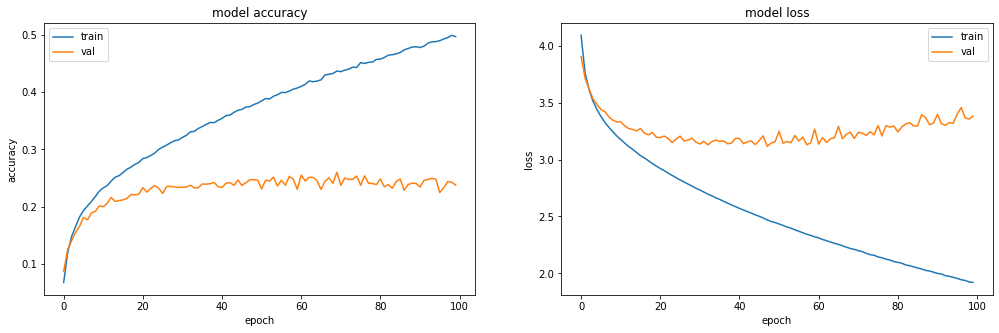

In [ ]:
softmax_sgd = create_model_softmax()
model_creator(softmax_sgd,SGD(),SparseCategoricalCrossentropy(),num_of_epochs=100)

In [ ]:
model_evaluation(softmax_sgd)

Test Accuracy = 0.25099998712539673
Test Loss = 3.352327346801758


### 2) **MLP**: FC(512), RELU, FC(200), SOFTMAX

**Optimizer = SGD(), loss = SparseCategoricalCrossentropy(), metric = 'accuracy', epochs = 100** 

Model: "sequential_69"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_69 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dense_165 (Dense)            (None, 512)               1573376   
_________________________________________________________________
dense_166 (Dense)            (None, 200)               102600    
_________________________________________________________________
dense_167 (Dense)            (None, 80)                16080     
Total params: 1,692,056
Trainable params: 1,692,056
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
1063/1063 [==============================] - 4s 4ms/step - loss: 4.0959 - accuracy: 0.0660 - val_loss: 3.8632 - val_accuracy: 0.1032
Epoch 2/100
1063/1063 [==============================] - 4s 4ms/step - loss: 3.7216 - accuracy: 

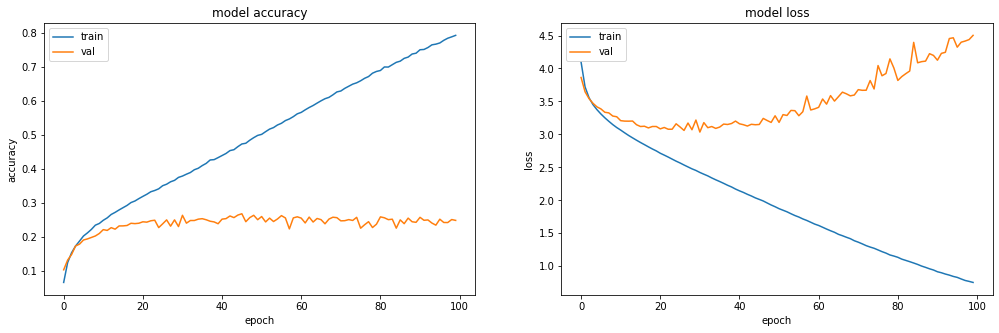

In [ ]:
mlp_sgd = create_model_mlp()
model_creator(mlp_sgd,SGD(),SparseCategoricalCrossentropy(),num_of_epochs=100)

In [ ]:
model_evaluation(mlp_sgd)

Test Accuracy = 0.24899999797344208
Test Loss = 4.530134677886963


### 3) **LeNet**: CONV(32, 3), RELU, POOL(2), CONV(32,3), RELU, POOL(2), FC(512, RELU, FC(200),SOFTMAX

**Optimizer = Adam(), loss = SparseCategoricalCrossentropy(), metric = 'accuracy', epochs = 100** 

Model: "sequential_70"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_96 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_72 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_97 (Conv2D)           (None, 13, 13, 32)        9248      
_________________________________________________________________
max_pooling2d_73 (MaxPooling (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_70 (Flatten)         (None, 1152)              0         
_________________________________________________________________
dense_168 (Dense)            (None, 512)               590336    
_________________________________________________________________
dense_169 (Dense)            (None, 200)             

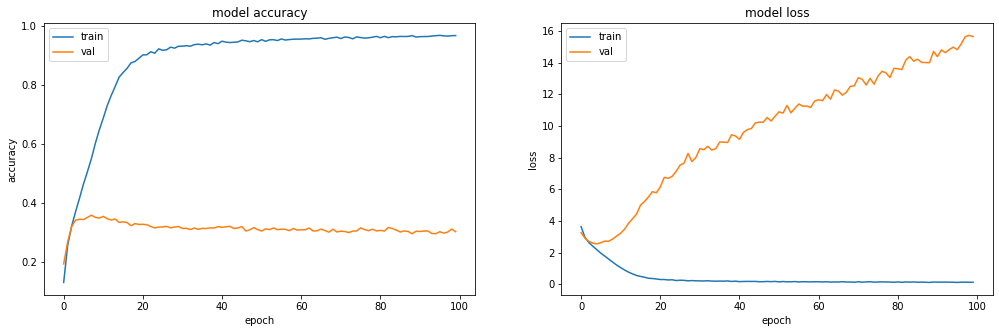

In [ ]:
lenet_adam = create_model_lenet()
model_creator(lenet_adam,Adam(),SparseCategoricalCrossentropy(),num_of_epochs=100)

In [ ]:
model_evaluation(lenet_adam)

Test Accuracy = 0.3083750009536743
Test Loss = 15.542121887207031


### 4) **CNN1**: CONV(16, 5), RELU, POOL(2), CONV(16,3), RELU, POOL(2), CONV(32, 3), RELU, FC(200), SOFTMAX

**Optimizer = Adam(), loss = SparseCategoricalCrossentropy(), metric = 'accuracy', epochs = 100**

Model: "sequential_71"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_98 (Conv2D)           (None, 28, 28, 16)        1216      
_________________________________________________________________
max_pooling2d_74 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_99 (Conv2D)           (None, 12, 12, 16)        2320      
_________________________________________________________________
max_pooling2d_75 (MaxPooling (None, 6, 6, 16)          0         
_________________________________________________________________
conv2d_100 (Conv2D)          (None, 4, 4, 32)          4640      
_________________________________________________________________
flatten_71 (Flatten)         (None, 512)               0         
_________________________________________________________________
dense_171 (Dense)            (None, 200)             

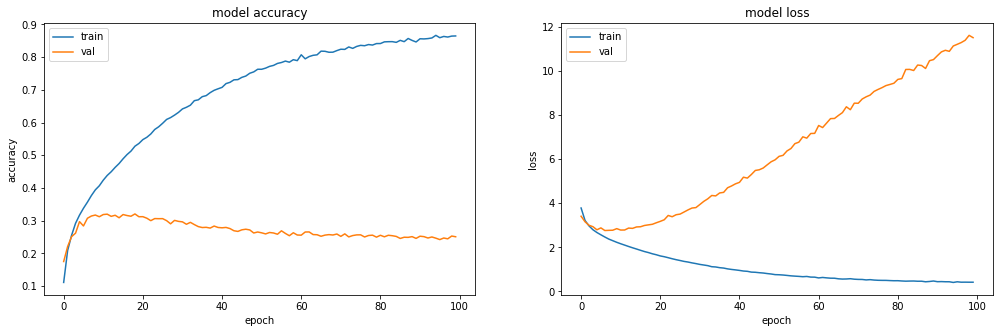

In [ ]:
cnn1_adam = create_model_cnn1()
model_creator(cnn1_adam,Adam(),SparseCategoricalCrossentropy(),num_of_epochs=100)

In [ ]:
model_evaluation(cnn1_adam)

Test Accuracy = 0.25824999809265137
Test Loss = 11.426534652709961


### 5) **CNN2**: Δικό μας μοντέλο

**Optimizer = Adam(), loss = SparseCategoricalCrossentropy(), metric = 'accuracy', epochs = 100**

Model: "sequential_72"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_101 (Conv2D)          (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_76 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_102 (Conv2D)          (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_77 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_103 (Conv2D)          (None, 4, 4, 128)         73856     
_________________________________________________________________
average_pooling2d_13 (Averag (None, 2, 2, 128)         0         
_________________________________________________________________
flatten_72 (Flatten)         (None, 512)             

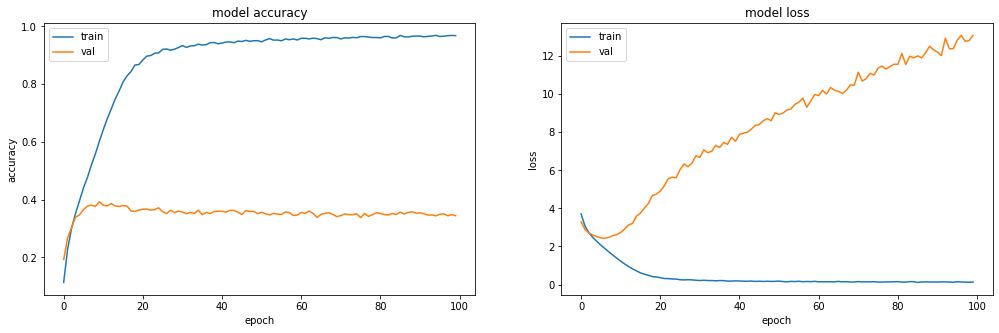

In [ ]:
cnn2_adam = create_model_cnn2()
model_creator(cnn2_adam,Adam(),SparseCategoricalCrossentropy(),num_of_epochs=100)

In [ ]:
model_evaluation(cnn2_adam)

Test Accuracy = 0.3553749918937683
Test Loss = 12.813516616821289


## **Διαγράμματα ακρίβειας μοντέλων-αριθμου κλάσεων**

Έχοντας εκπαιδεύσει τα μοντέλα για διαφορετικό αριθμό κλάσεων κατασκευάζουμε τα διαγράμματα που απεικονίζουν την επίδραση του πλήθους των κλάσεων στο test accuracy και στο test loss.

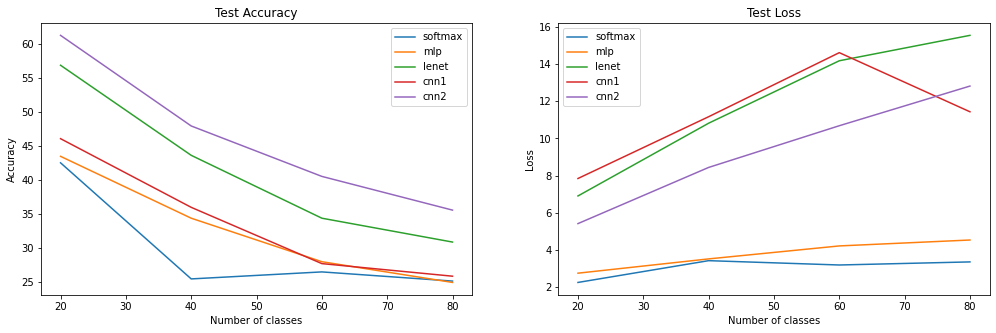

In [ ]:
fig, ax = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(17)

CLASSES = [20,40,60,80]

# Plot accuracy

ax[0].plot(CLASSES , [42.5,25.42,26.45,25.1], label='softmax')
ax[0].plot(CLASSES , [43.45,34.35,27.95,24.9], label='mlp')
ax[0].plot(CLASSES , [56.85,43.6,34.35,30.84], label='lenet')
ax[0].plot(CLASSES , [46.05,35.95,27.67,25.82], label='cnn1')
ax[0].plot(CLASSES , [61.25,47.92,40.5,35.54], label='cnn2')
ax[0].set_title("Test Accuracy")
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Number of classes')
ax[0].legend(loc='best')

# Plot loss

ax[1].plot(CLASSES , [2.247,3.419,3.186,3.352], label='softmax')
ax[1].plot(CLASSES , [2.746,3.514,4.212,4.53], label='mlp')
ax[1].plot(CLASSES , [6.901,10.815,14.175,15.542], label='lenet')
ax[1].plot(CLASSES , [7.84,11.164,14.611,11.43], label='cnn1')
ax[1].plot(CLASSES , [5.413,8.435,10.679,12.813], label='cnn2')
ax[1].set_title("Test Loss")
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Number of classes')
ax[1].legend(loc='best')

Όπως φαίνεται στα παραπάνω διαγράμματα, **όσο μεγαλώνει ο αριθμός των κλάσεων (και παράλληλα το σύνολο των δεδομένων μας) η ακρίβεια των μοντέλων (accuracy) ελαττώνεται ενώ παράλληλα μεγαλώνει και η απώλεια (loss) πάνω στα test δεδομένα**. Συνεπώς, η ποιότητα των μοντέλων χειροτερεύει. Η πτώση της απόδοσης σε πολλές περιπτώσεις υπερβαίνει το 10% καθώς οι κλάσεις αυξάνονται κατά 20.  Αυτό είναι αναμενόμενο καθώς το πρόβλημα κατηγοριοποίησης γίνεται δυσκολότερο όσο μεγαλώνει ο αριθμός των κλάσεων πάνω στις οποίες ένα δίκτυο κάνει κατηγοριοποίηση. 

# **Επίδραση της απόδοσης με μεταβολή του αλγορίθμου βελτιστοποίησης (optimizer)**

Χρησιμοποιούμε διαφορετικούς αλγορίθμου βελτιστοποίησης (Adam, Nadam, SGD και Adagrad) ώστε να δούμε πως αυτού επηρεάζουν την ακρίβεια του μοντέλου (test accuracy).

In [ ]:
history = {k: [] for k in ["adam","adagrad","nadam","sgd"]}

In [ ]:
def model_creator(optimizer_name,model,opt,loss_function,num_of_epochs,metric_score='accuracy'):
  
  # Compile model
  model.compile(optimizer=opt,
              loss=loss_function,
              metrics=[metric_score])
      
  # Train model
  history[optimizer_name] = model.fit(x_train, y_train_new,batch_size = 32, epochs=num_of_epochs, validation_data=(x_val,y_val_new), verbose=0)

### 1) **Softmax (baseline)**: FC(200), SOFTMAX

**Optimizer = Adam(), loss = SparseCategoricalCrossentropy(), metric = 'accuracy', epochs = 100** 

In [ ]:
model_softmax = create_model_softmax()
model_creator("adam",model_softmax,Adam(),SparseCategoricalCrossentropy(),num_of_epochs=100)

**Optimizer = Adagrad(), loss = SparseCategoricalCrossentropy(), metric = 'accuracy', epochs = 100** 

In [ ]:
model_softmax = create_model_softmax()
model_creator("adagrad",model_softmax,Adagrad(),SparseCategoricalCrossentropy(),num_of_epochs=100)

**Optimizer = Nadam(), loss = SparseCategoricalCrossentropy(), metric = 'accuracy', epochs = 100** 

In [ ]:
model_softmax = create_model_softmax()
model_creator("nadam",model_softmax,Nadam(),SparseCategoricalCrossentropy(),num_of_epochs=100)

**Optimizer = SGD(), loss = SparseCategoricalCrossentropy(), metric = 'accuracy', epochs = 100** 

In [ ]:
model_softmax = create_model_softmax()
model_creator("sgd",model_softmax,SGD(),SparseCategoricalCrossentropy(),num_of_epochs=100)

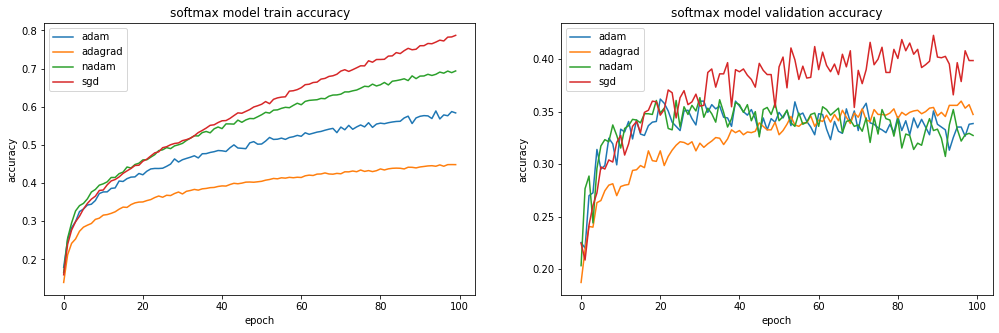

In [ ]:
fig, ax = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(17)

optimizers = ["adam","adagrad","nadam","sgd"]

for optimizer in optimizers:
  hist = history[optimizer]

  # Plot accuracy
  ax[0].plot(hist.history['accuracy'], label=optimizer)
  ax[0].set_title('softmax model train accuracy')
  ax[0].set_ylabel('accuracy')
  ax[0].set_xlabel('epoch')
  ax[0].legend(loc='best')

  # Plot loss
  ax[1].plot(hist.history['val_accuracy'], label=optimizer)
  ax[1].set_title('softmax model validation accuracy')
  ax[1].set_ylabel('accuracy')
  ax[1].set_xlabel('epoch')
  ax[1].legend(loc='best')

Παρατηρούμε ότι για το μοντέλο **Softmax** ο **καλύτερος αλγόριθμος βελτιστοποίησης (optimizer)** για loss = SparseCategoricalCrossentropy(), metric = 'accuracy' και epochs = 100 είναι ο **SGD**. Ακολουθεί ο optimizer **Adagrad** ενώ τη χειρότερη απόδοση δίνουν οι adam και nadam.

### 2) **MLP**: FC(512), RELU, FC(200), SOFTMAX


In [ ]:
history = {k: [] for k in ["adam","adagrad","nadam","sgd"]}

**Optimizer = Adam(), loss = SparseCategoricalCrossentropy(), metric = 'accuracy', epochs = 100** 

In [ ]:
model_mlp = create_model_mlp()
model_creator("adam",model_mlp,Adam(),SparseCategoricalCrossentropy(),num_of_epochs=100)

**Optimizer = Adagrad(), loss = SparseCategoricalCrossentropy(), metric = 'accuracy', epochs = 100** 

In [ ]:
model_mlp = create_model_mlp()
model_creator("adagrad",model_mlp,Adagrad(),SparseCategoricalCrossentropy(),num_of_epochs=100)

**Optimizer = Nadam(), loss = SparseCategoricalCrossentropy(), metric = 'accuracy', epochs = 100** 

In [ ]:
model_mlp = create_model_mlp()
model_creator("nadam",model_mlp,Nadam(),SparseCategoricalCrossentropy(),num_of_epochs=100)

**Optimizer = SGD(), loss = SparseCategoricalCrossentropy(), metric = 'accuracy', epochs = 100** 

In [ ]:
model_mlp = create_model_mlp()
model_creator("sgd",model_mlp,SGD(),SparseCategoricalCrossentropy(),num_of_epochs=100)

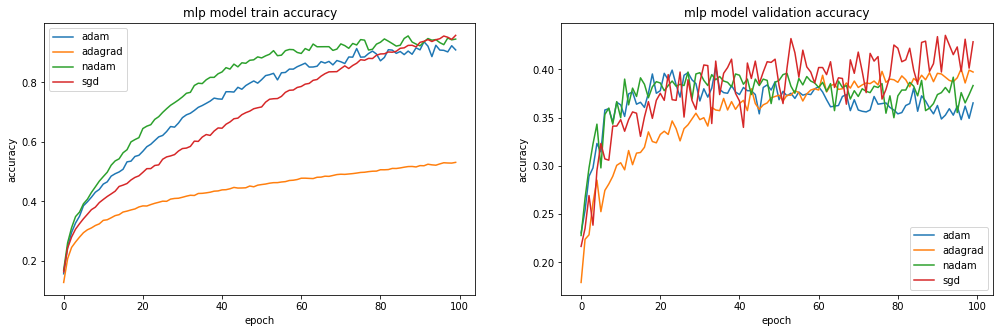

In [ ]:
fig, ax = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(17)

optimizers = ["adam","adagrad","nadam","sgd"]

for optimizer in optimizers:
  hist = history[optimizer]

  # Plot accuracy
  ax[0].plot(hist.history['accuracy'], label=optimizer)
  ax[0].set_title('mlp model train accuracy')
  ax[0].set_ylabel('accuracy')
  ax[0].set_xlabel('epoch')
  ax[0].legend(loc='best')

  # Plot loss
  ax[1].plot(hist.history['val_accuracy'], label=optimizer)
  ax[1].set_title('mlp model validation accuracy')
  ax[1].set_ylabel('accuracy')
  ax[1].set_xlabel('epoch')
  ax[1].legend(loc='best')

Παρατηρούμε ότι όμοια με το προηγούμενο μοντέλο (**Softmax**), ο **καλύτερος αλγόριθμος βελτιστοποίησης (optimizer)** για loss = SparseCategoricalCrossentropy(), metric = 'accuracy' και epochs = 100 είναι ο **SGD**. Ακολουθεί ο optimizer **Adagrad** ενώ τη χειρότερη απόδοση δίνουν οι adam και nadam.

### 3) **LeNet**: CONV(32, 3), RELU, POOL(2), CONV(32,3), RELU, POOL(2), FC(512), RELU, FC(200),SOFTMAX
 

In [ ]:
history = {k: [] for k in ["adam","adagrad","nadam","sgd"]}

**Optimizer = Adam(), loss = SparseCategoricalCrossentropy(), metric = 'accuracy', epochs = 100** 

In [ ]:
model_lenet = create_model_lenet()
model_creator("adam",model_lenet,Adam(),SparseCategoricalCrossentropy(),num_of_epochs=100)

**Optimizer = Adagrad(), loss = SparseCategoricalCrossentropy(), metric = 'accuracy', epochs = 100** 

In [ ]:
model_lenet = create_model_lenet()
model_creator("adagrad",model_lenet,Adagrad(),SparseCategoricalCrossentropy(),num_of_epochs=100)

**Optimizer = Nadam(), loss = SparseCategoricalCrossentropy(), metric = 'accuracy', epochs = 100** 

In [ ]:
model_lenet = create_model_lenet()
model_creator("nadam",model_lenet,Nadam(),SparseCategoricalCrossentropy(),num_of_epochs=100)

**Optimizer = SGD(), loss = SparseCategoricalCrossentropy(), metric = 'accuracy', epochs = 100** 

In [ ]:
model_lenet = create_model_lenet()
model_creator("sgd",model_lenet,SGD(),SparseCategoricalCrossentropy(),num_of_epochs=100)

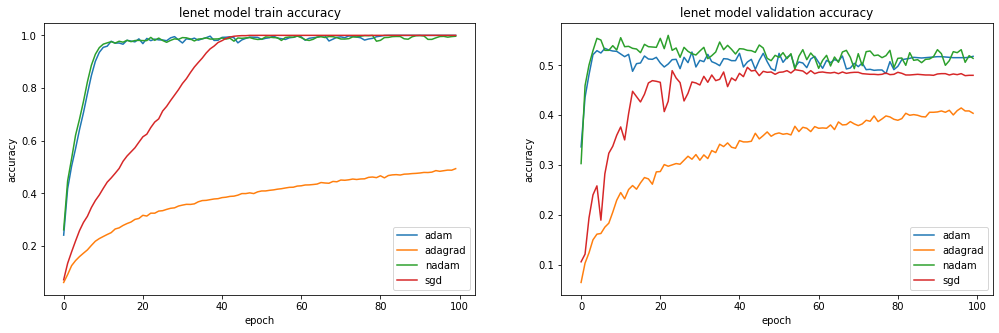

In [ ]:
fig, ax = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(17)

optimizers = ["adam","adagrad","nadam","sgd"]

for optimizer in optimizers:
  hist = history[optimizer]

  # Plot accuracy
  ax[0].plot(hist.history['accuracy'], label=optimizer)
  ax[0].set_title('lenet model train accuracy')
  ax[0].set_ylabel('accuracy')
  ax[0].set_xlabel('epoch')
  ax[0].legend(loc='best')

  # Plot loss
  ax[1].plot(hist.history['val_accuracy'], label=optimizer)
  ax[1].set_title('lenet model validation accuracy')
  ax[1].set_ylabel('accuracy')
  ax[1].set_xlabel('epoch')
  ax[1].legend(loc='best')

Παρατηρούμε ότι για το δίκτυο **Lenet** οι **καλύτεροι αλγόριθμοι βελτιστοποίησης (optimizer)** για loss = SparseCategoricalCrossentropy(), metric = 'accuracy' και epochs = 100 είναι οι **Adam** και **Nadam**, οι οποίοι παρουσιάζουν παρόμοια συμπεριφορά. Ακολουθεί ο **SGD** ενώ την χειρότερη απόδοση έχει ο **optimizer** Adagrad.

### 4) **CNN1**: CONV(16, 5), RELU, POOL(2), CONV(16,3), RELU, POOL(2), CONV(32, 3), RELU, FC(200), SOFTMAX


In [ ]:
history = {k: [] for k in ["adam","adagrad","nadam","sgd"]}

**Optimizer = Adam(), loss = SparseCategoricalCrossentropy(), metric = 'accuracy', epochs = 100** 

In [ ]:
model_cnn1 = create_model_cnn1()
model_creator("adam",model_cnn1,Adam(),SparseCategoricalCrossentropy(),num_of_epochs=100)

**Optimizer = Adagrad(), loss = SparseCategoricalCrossentropy(), metric = 'accuracy', epochs = 100** 

In [ ]:
model_cnn1 = create_model_cnn1()
model_creator("adagrad",model_cnn1,Adagrad(),SparseCategoricalCrossentropy(),num_of_epochs=100)

**Optimizer = Nadam(), loss = SparseCategoricalCrossentropy(), metric = 'accuracy', epochs = 100** 

In [ ]:
model_cnn1 = create_model_cnn1()
model_creator("nadam",model_cnn1,Nadam(),SparseCategoricalCrossentropy(),num_of_epochs=100)

**Optimizer = SGD(), loss = SparseCategoricalCrossentropy(), metric = 'accuracy', epochs = 100** 

In [ ]:
model_cnn1 = create_model_cnn1()
model_creator("sgd",model_cnn1,SGD(),SparseCategoricalCrossentropy(),num_of_epochs=100)

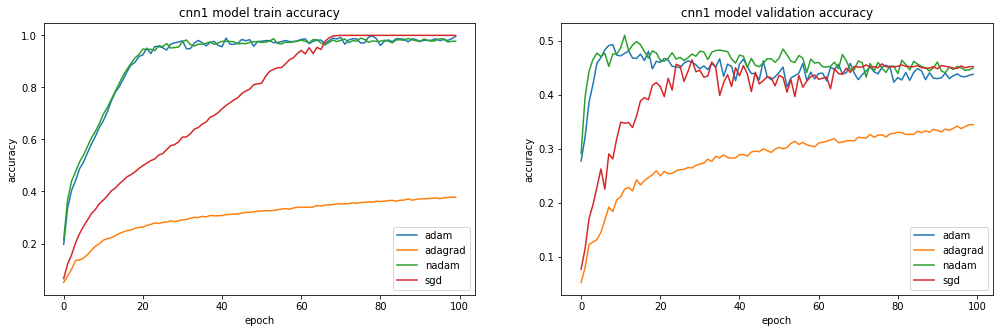

In [ ]:
fig, ax = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(17)

optimizers = ["adam","adagrad","nadam","sgd"]

for optimizer in optimizers:
  hist = history[optimizer]

  # Plot accuracy
  ax[0].plot(hist.history['accuracy'], label=optimizer)
  ax[0].set_title('cnn1 model train accuracy')
  ax[0].set_ylabel('accuracy')
  ax[0].set_xlabel('epoch')
  ax[0].legend(loc='best')

  # Plot loss
  ax[1].plot(hist.history['val_accuracy'], label=optimizer)
  ax[1].set_title('cnn1 model validation accuracy')
  ax[1].set_ylabel('accuracy')
  ax[1].set_xlabel('epoch')
  ax[1].legend(loc='best')

Παρατηρούμε ότι για το δίκτυο **Cnn1** οι **καλύτεροι αλγόριθμοι βελτιστοποίησης (optimizer)** για loss = SparseCategoricalCrossentropy(), metric = 'accuracy' και epochs = 100 είναι οι **Adam**, **Nadam** και **SGD**, οι οποίοι παρουσιάζουν παραπλήσιο accuracy προς το τέλος της εκπαίδευσής του μοντέλου. Να το τονιστεί βέβαια ότι για μικρό αριθμό εποχών παρατηρούμε ότι οι **Adam** και **Nadam** οδηγούν σε αρκετά καλύτερη ακρίβεια και άρα με χρήση κατάλληλων τεχνικών αντιμετώπισης του overfitting (όπως Dropout και Data Augmentation) μπορούν να λειτουργήσουν πιο αποτελεσματικά. Τελευταίος βρίσκεται ο **optimizer** Adagrad με την χειρότερη απόδοση.

### 5) **CNN2**: Δικό μας μοντέλο


In [ ]:
history = {k: [] for k in ["adam","adagrad","nadam","sgd"]}

**Optimizer = Adam(), loss = SparseCategoricalCrossentropy(), metric = 'accuracy', epochs = 100** 

In [ ]:
model_cnn2 = create_model_cnn2()
model_creator("adam",model_cnn2,Adam(),SparseCategoricalCrossentropy(),num_of_epochs=100)

**Optimizer = Adagrad(), loss = SparseCategoricalCrossentropy(), metric = 'accuracy', epochs = 100** 

In [ ]:
model_cnn2 = create_model_cnn2()
model_creator("adagrad",model_cnn2,Adagrad(),SparseCategoricalCrossentropy(),num_of_epochs=100)

**Optimizer = Nadam(), loss = SparseCategoricalCrossentropy(), metric = 'accuracy', epochs = 100** 

In [ ]:
model_cnn2 = create_model_cnn2()
model_creator("nadam",model_cnn2,Nadam(),SparseCategoricalCrossentropy(),num_of_epochs=100)

**Optimizer = SGD(), loss = SparseCategoricalCrossentropy(), metric = 'accuracy', epochs = 100** 

In [ ]:
model_cnn2 = create_model_cnn2()
model_creator("sgd",model_cnn2,SGD(),SparseCategoricalCrossentropy(),num_of_epochs=100)

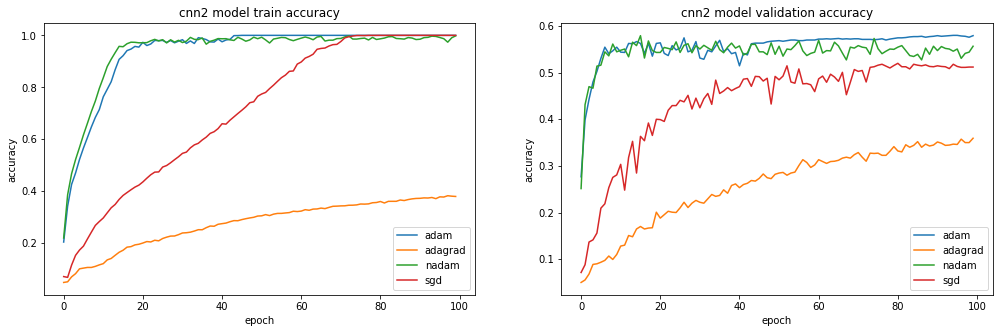

In [ ]:
fig, ax = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(17)

optimizers = ["adam","adagrad","nadam","sgd"]

for optimizer in optimizers:
  hist = history[optimizer]

  # Plot accuracy
  ax[0].plot(hist.history['accuracy'], label=optimizer)
  ax[0].set_title('cnn2 model train accuracy')
  ax[0].set_ylabel('accuracy')
  ax[0].set_xlabel('epoch')
  ax[0].legend(loc='best')

  # Plot loss
  ax[1].plot(hist.history['val_accuracy'], label=optimizer)
  ax[1].set_title('cnn2 model validation accuracy')
  ax[1].set_ylabel('accuracy')
  ax[1].set_xlabel('epoch')
  ax[1].legend(loc='best')

Παρατηρούμε ότι για το δίκτυο **Cnn2** που εμείς κατασκευάσαμε, οι **καλύτεροι αλγόριθμοι βελτιστοποίησης (optimizer)** για loss = SparseCategoricalCrossentropy(), metric = 'accuracy' και epochs = 100 είναι οι **Adam** και **Nadam**, οι οποίοι παρουσιάζουν παρόμοια συμπεριφορά. Ακολουθεί ο **SGD** ενώ την χειρότερη απόδοση έχει ο **optimizer** Adagrad.

# **Επίδραση της απόδοσης με μεταβολή του batch size**

Αυξάνουμε διαδοχικά το batch size από 32 σε 64,128 και τέλος 256 ώστε να δούμε πως η αύξηση αυτή επηρεάζει την ακρίβεια του μοντέλου (test accuracy).

## **Batch size = 64**

In [ ]:
# Batch size
batches = 64

### 1) **Softmax (baseline)**: FC(200), SOFTMAX

**Optimizer = SGD(), loss = SparseCategoricalCrossentropy(), metric = 'accuracy', epochs = 100** 

Model: "sequential_73"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_73 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dense_175 (Dense)            (None, 200)               614600    
_________________________________________________________________
dense_176 (Dense)            (None, 20)                4020      
Total params: 618,620
Trainable params: 618,620
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
133/133 [==============================] - 1s 5ms/step - loss: 2.8454 - accuracy: 0.1427 - val_loss: 2.7451 - val_accuracy: 0.1920
Epoch 2/100
133/133 [==============================] - 1s 4ms/step - loss: 2.6432 - accuracy: 0.2153 - val_loss: 2.6206 - val_accuracy: 0.2107
Epoch 3/100
133/133 [==============================] - 1s 4ms/step - loss: 2.5367 - accurac

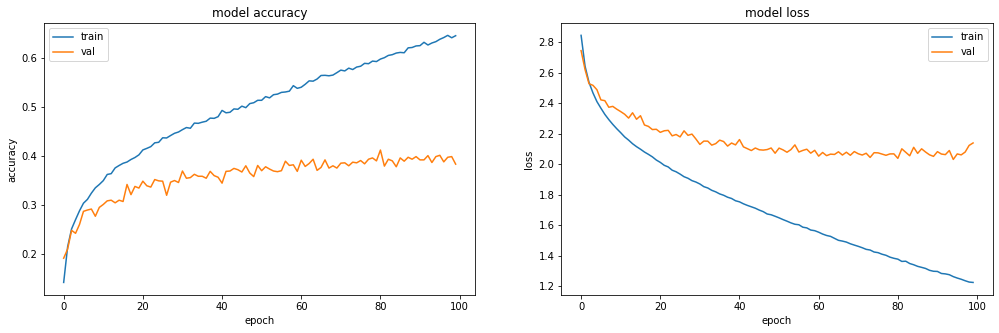

In [ ]:
softmax_sgd = create_model_softmax()
model_creator(softmax_sgd,SGD(),SparseCategoricalCrossentropy(),num_of_epochs=100)

In [ ]:
model_evaluation(softmax_sgd)

Test Accuracy = 0.3995000123977661
Test Loss = 2.0746817588806152


### 2) **MLP**: FC(512), RELU, FC(200), SOFTMAX

**Optimizer = SGD(), loss = SparseCategoricalCrossentropy(), metric = 'accuracy', epochs = 100** 

Model: "sequential_74"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_74 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dense_177 (Dense)            (None, 512)               1573376   
_________________________________________________________________
dense_178 (Dense)            (None, 200)               102600    
_________________________________________________________________
dense_179 (Dense)            (None, 20)                4020      
Total params: 1,679,996
Trainable params: 1,679,996
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
133/133 [==============================] - 1s 6ms/step - loss: 2.8386 - accuracy: 0.1432 - val_loss: 2.7413 - val_accuracy: 0.1773
Epoch 2/100
133/133 [==============================] - 1s 5ms/step - loss: 2.6231 - accuracy: 0.22

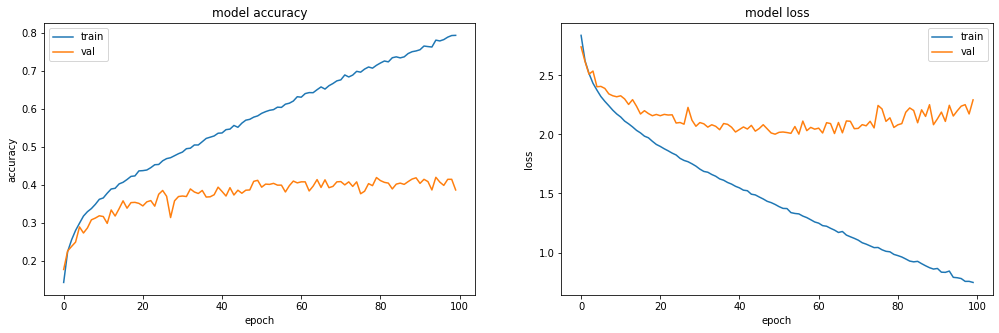

In [ ]:
mlp_sgd = create_model_mlp()
model_creator(mlp_sgd,SGD(),SparseCategoricalCrossentropy(),num_of_epochs=100)

In [ ]:
model_evaluation(mlp_sgd)

Test Accuracy = 0.4129999876022339
Test Loss = 2.245635509490967


### 3) **LeNet**: CONV(32, 3), RELU, POOL(2), CONV(32,3), RELU, POOL(2), FC(512, RELU, FC(200),SOFTMAX

**Optimizer = Adam(), loss = SparseCategoricalCrossentropy(), metric = 'accuracy', epochs = 100** 

Model: "sequential_75"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_104 (Conv2D)          (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_78 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_105 (Conv2D)          (None, 13, 13, 32)        9248      
_________________________________________________________________
max_pooling2d_79 (MaxPooling (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_75 (Flatten)         (None, 1152)              0         
_________________________________________________________________
dense_180 (Dense)            (None, 512)               590336    
_________________________________________________________________
dense_181 (Dense)            (None, 200)             

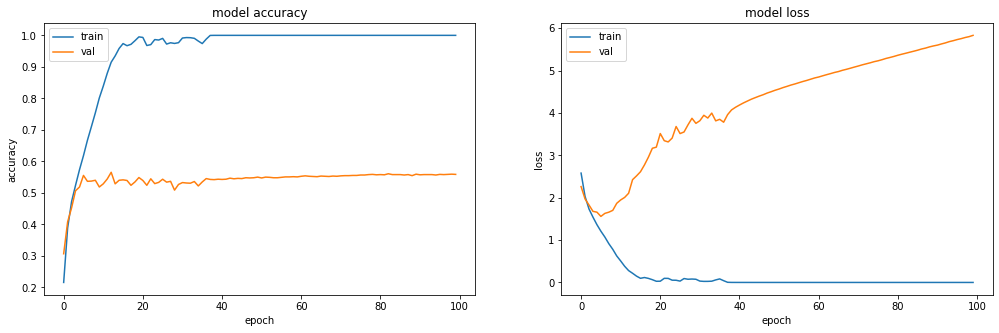

In [ ]:
lenet_adam = create_model_lenet()
model_creator(lenet_adam,Adam(),SparseCategoricalCrossentropy(),num_of_epochs=100)

In [ ]:
model_evaluation(lenet_adam)

Test Accuracy = 0.5730000138282776
Test Loss = 5.292084217071533


### 4) **CNN1**: CONV(16, 5), RELU, POOL(2), CONV(16,3), RELU, POOL(2), CONV(32, 3), RELU, FC(200), SOFTMAX

**Optimizer = Adam(), loss = SparseCategoricalCrossentropy(), metric = 'accuracy', epochs = 100**

Model: "sequential_76"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_106 (Conv2D)          (None, 28, 28, 16)        1216      
_________________________________________________________________
max_pooling2d_80 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_107 (Conv2D)          (None, 12, 12, 16)        2320      
_________________________________________________________________
max_pooling2d_81 (MaxPooling (None, 6, 6, 16)          0         
_________________________________________________________________
conv2d_108 (Conv2D)          (None, 4, 4, 32)          4640      
_________________________________________________________________
flatten_76 (Flatten)         (None, 512)               0         
_________________________________________________________________
dense_183 (Dense)            (None, 200)             

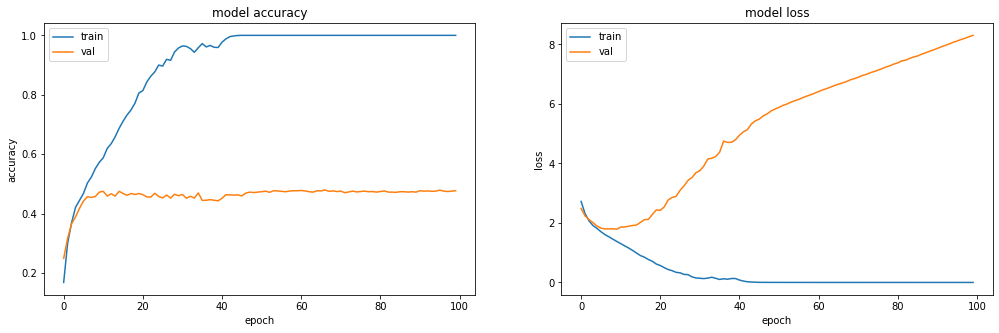

In [ ]:
cnn1_adam = create_model_cnn1()
model_creator(cnn1_adam,Adam(),SparseCategoricalCrossentropy(),num_of_epochs=100)

In [ ]:
model_evaluation(cnn1_adam)

Test Accuracy = 0.47699999809265137
Test Loss = 7.985286712646484


### 5) **CNN2**: Δικό μας μοντέλο

**Optimizer = Adam(), loss = SparseCategoricalCrossentropy(), metric = 'accuracy', epochs = 100**

Model: "sequential_77"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_109 (Conv2D)          (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_82 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_110 (Conv2D)          (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_83 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_111 (Conv2D)          (None, 4, 4, 128)         73856     
_________________________________________________________________
average_pooling2d_14 (Averag (None, 2, 2, 128)         0         
_________________________________________________________________
flatten_77 (Flatten)         (None, 512)             

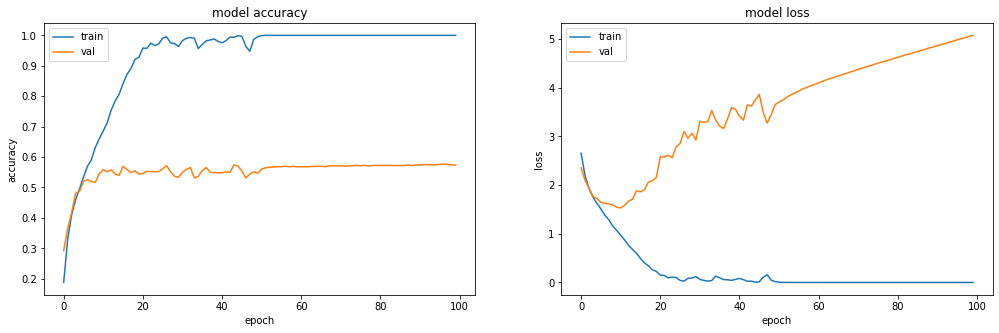

In [ ]:
cnn2_adam = create_model_cnn2()
model_creator(cnn2_adam,Adam(),SparseCategoricalCrossentropy(),num_of_epochs=100)

In [ ]:
model_evaluation(cnn2_adam)

Test Accuracy = 0.5924999713897705
Test Loss = 4.6878862380981445


## **Batch size = 128**

In [ ]:
# Batch size
batches = 128

### 1) **Softmax (baseline)**: FC(200), SOFTMAX

**Optimizer = SGD(), loss = SparseCategoricalCrossentropy(), metric = 'accuracy', epochs = 100** 

Model: "sequential_78"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_78 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dense_187 (Dense)            (None, 200)               614600    
_________________________________________________________________
dense_188 (Dense)            (None, 20)                4020      
Total params: 618,620
Trainable params: 618,620
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
67/67 [==============================] - 0s 6ms/step - loss: 2.9038 - accuracy: 0.1214 - val_loss: 2.8135 - val_accuracy: 0.1693
Epoch 2/100
67/67 [==============================] - 0s 5ms/step - loss: 2.7279 - accuracy: 0.1928 - val_loss: 2.7069 - val_accuracy: 0.2060
Epoch 3/100
67/67 [==============================] - 0s 5ms/step - loss: 2.6346 - accuracy: 0.2

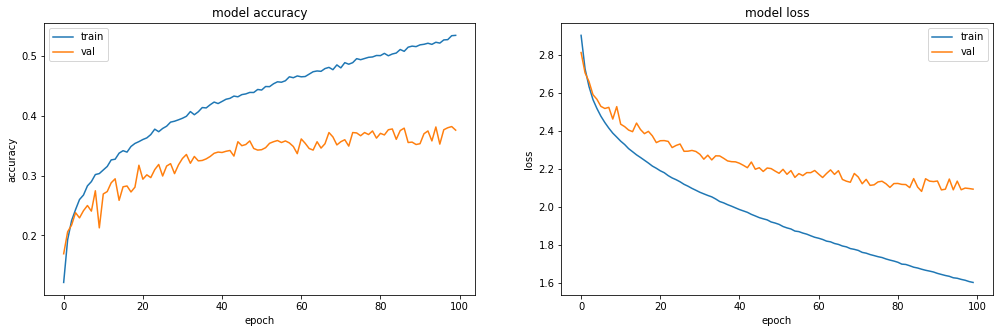

In [ ]:
softmax_sgd = create_model_softmax()
model_creator(softmax_sgd,SGD(),SparseCategoricalCrossentropy(),num_of_epochs=100)

In [ ]:
model_evaluation(softmax_sgd)

Test Accuracy = 0.39100000262260437
Test Loss = 2.0390243530273438


### 2) **MLP**: FC(512), RELU, FC(200), SOFTMAX

**Optimizer = SGD(), loss = SparseCategoricalCrossentropy(), metric = 'accuracy', epochs = 100** 

Model: "sequential_79"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_79 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dense_189 (Dense)            (None, 512)               1573376   
_________________________________________________________________
dense_190 (Dense)            (None, 200)               102600    
_________________________________________________________________
dense_191 (Dense)            (None, 20)                4020      
Total params: 1,679,996
Trainable params: 1,679,996
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
67/67 [==============================] - 0s 7ms/step - loss: 2.8817 - accuracy: 0.1368 - val_loss: 2.7956 - val_accuracy: 0.1853
Epoch 2/100
67/67 [==============================] - 0s 6ms/step - loss: 2.7010 - accuracy: 0.2101 -

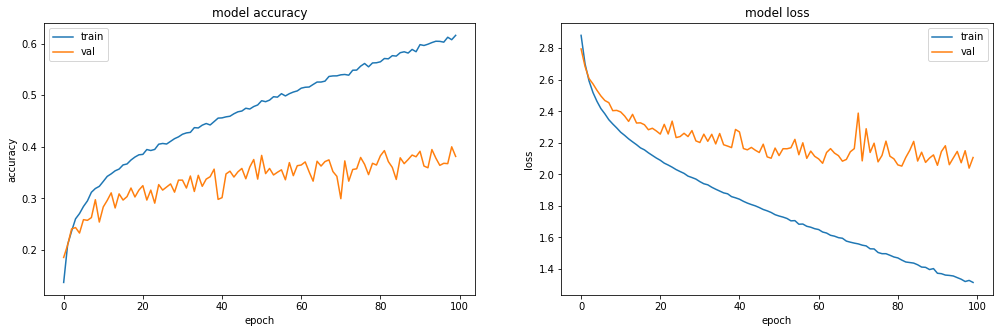

In [ ]:
mlp_sgd = create_model_mlp()
model_creator(mlp_sgd,SGD(),SparseCategoricalCrossentropy(),num_of_epochs=100)

In [ ]:
model_evaluation(mlp_sgd)

Test Accuracy = 0.3889999985694885
Test Loss = 2.0815868377685547


### 3) **LeNet**: CONV(32, 3), RELU, POOL(2), CONV(32,3), RELU, POOL(2), FC(512, RELU, FC(200),SOFTMAX

**Optimizer = Adam(), loss = SparseCategoricalCrossentropy(), metric = 'accuracy', epochs = 100** 

Model: "sequential_80"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_112 (Conv2D)          (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_84 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_113 (Conv2D)          (None, 13, 13, 32)        9248      
_________________________________________________________________
max_pooling2d_85 (MaxPooling (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_80 (Flatten)         (None, 1152)              0         
_________________________________________________________________
dense_192 (Dense)            (None, 512)               590336    
_________________________________________________________________
dense_193 (Dense)            (None, 200)             

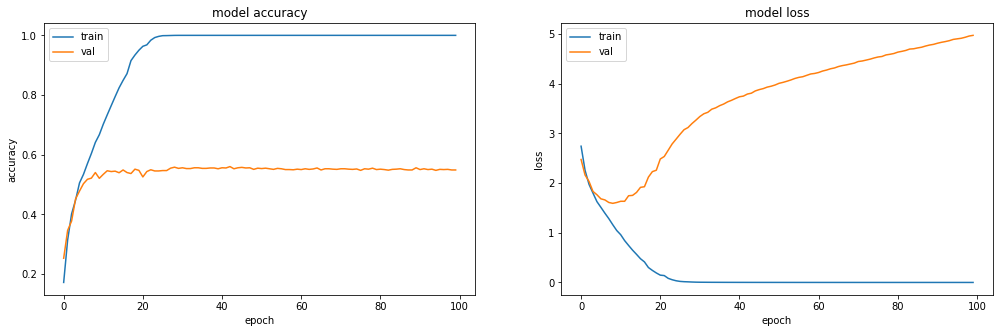

In [ ]:
lenet_adam = create_model_lenet()
model_creator(lenet_adam,Adam(),SparseCategoricalCrossentropy(),num_of_epochs=100)

In [ ]:
model_evaluation(lenet_adam)

Test Accuracy = 0.5565000176429749
Test Loss = 4.751338958740234


### 4) **CNN1**: CONV(16, 5), RELU, POOL(2), CONV(16,3), RELU, POOL(2), CONV(32, 3), RELU, FC(200), SOFTMAX

**Optimizer = Adam(), loss = SparseCategoricalCrossentropy(), metric = 'accuracy', epochs = 100**

Model: "sequential_81"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_114 (Conv2D)          (None, 28, 28, 16)        1216      
_________________________________________________________________
max_pooling2d_86 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_115 (Conv2D)          (None, 12, 12, 16)        2320      
_________________________________________________________________
max_pooling2d_87 (MaxPooling (None, 6, 6, 16)          0         
_________________________________________________________________
conv2d_116 (Conv2D)          (None, 4, 4, 32)          4640      
_________________________________________________________________
flatten_81 (Flatten)         (None, 512)               0         
_________________________________________________________________
dense_195 (Dense)            (None, 200)             

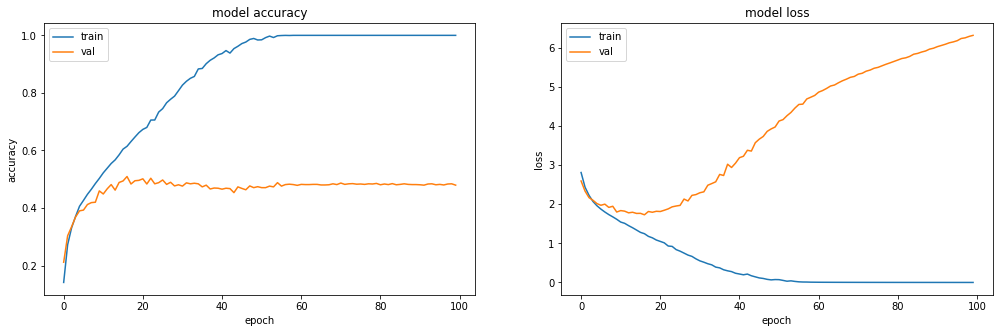

In [ ]:
cnn1_adam = create_model_cnn1()
model_creator(cnn1_adam,Adam(),SparseCategoricalCrossentropy(),num_of_epochs=100)

In [ ]:
model_evaluation(cnn1_adam)

Test Accuracy = 0.48350000381469727
Test Loss = 5.888801097869873


### 5) **CNN2**: Δικό μας μοντέλο

**Optimizer = Adam(), loss = SparseCategoricalCrossentropy(), metric = 'accuracy', epochs = 100**

Model: "sequential_82"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_117 (Conv2D)          (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_88 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_118 (Conv2D)          (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_89 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_119 (Conv2D)          (None, 4, 4, 128)         73856     
_________________________________________________________________
average_pooling2d_15 (Averag (None, 2, 2, 128)         0         
_________________________________________________________________
flatten_82 (Flatten)         (None, 512)             

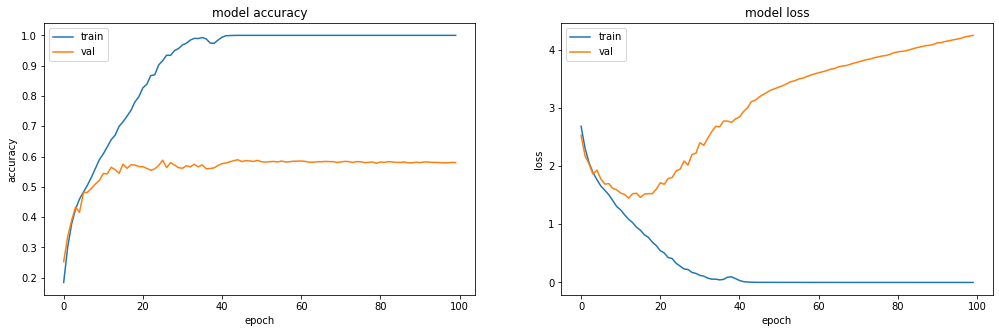

In [ ]:
cnn2_adam = create_model_cnn2()
model_creator(cnn2_adam,Adam(),SparseCategoricalCrossentropy(),num_of_epochs=100)

In [ ]:
model_evaluation(cnn2_adam)

Test Accuracy = 0.6100000143051147
Test Loss = 3.822068214416504


## **Batch size = 256**

In [ ]:
# Batch size
batches = 256

### 1) **Softmax (baseline)**: FC(200), SOFTMAX

**Optimizer = SGD(), loss = SparseCategoricalCrossentropy(), metric = 'accuracy', epochs = 100** 

Model: "sequential_83"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_83 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dense_199 (Dense)            (None, 200)               614600    
_________________________________________________________________
dense_200 (Dense)            (None, 20)                4020      
Total params: 618,620
Trainable params: 618,620
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
34/34 [==============================] - 0s 10ms/step - loss: 2.9535 - accuracy: 0.0934 - val_loss: 2.8970 - val_accuracy: 0.1167
Epoch 2/100
34/34 [==============================] - 0s 6ms/step - loss: 2.8246 - accuracy: 0.1492 - val_loss: 2.8276 - val_accuracy: 0.1473
Epoch 3/100
34/34 [==============================] - 0s 6ms/step - loss: 2.7501 - accuracy: 0.

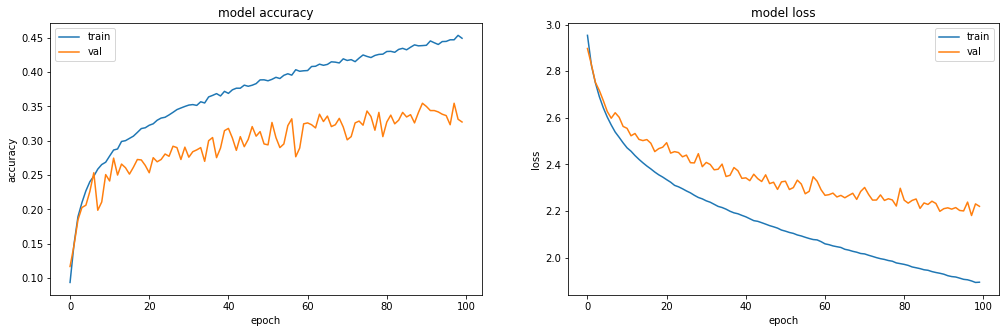

In [ ]:
softmax_sgd = create_model_softmax()
model_creator(softmax_sgd,SGD(),SparseCategoricalCrossentropy(),num_of_epochs=100)

In [ ]:
model_evaluation(softmax_sgd)

Test Accuracy = 0.3529999852180481
Test Loss = 2.1346189975738525


### 2) **MLP**: FC(512), RELU, FC(200), SOFTMAX

**Optimizer = SGD(), loss = SparseCategoricalCrossentropy(), metric = 'accuracy', epochs = 100** 

Model: "sequential_84"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_84 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dense_201 (Dense)            (None, 512)               1573376   
_________________________________________________________________
dense_202 (Dense)            (None, 200)               102600    
_________________________________________________________________
dense_203 (Dense)            (None, 20)                4020      
Total params: 1,679,996
Trainable params: 1,679,996
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
34/34 [==============================] - 0s 10ms/step - loss: 2.9482 - accuracy: 0.1048 - val_loss: 2.8923 - val_accuracy: 0.1227
Epoch 2/100
34/34 [==============================] - 0s 8ms/step - loss: 2.8210 - accuracy: 0.1598 

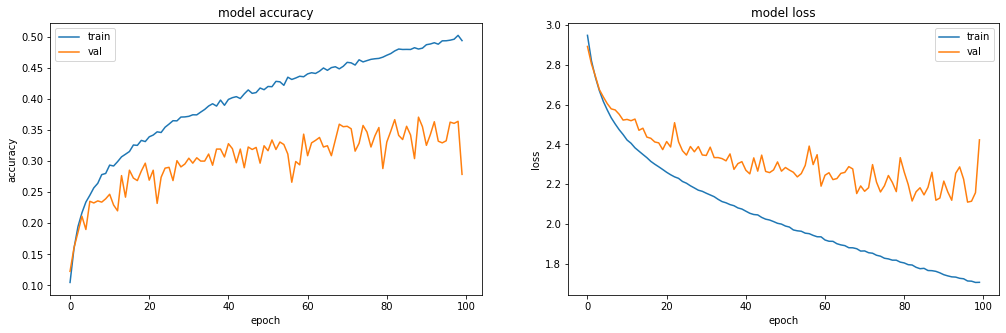

In [ ]:
mlp_sgd = create_model_mlp()
model_creator(mlp_sgd,SGD(),SparseCategoricalCrossentropy(),num_of_epochs=100)

In [ ]:
model_evaluation(mlp_sgd)

Test Accuracy = 0.296999990940094
Test Loss = 2.358462333679199


### 3) **LeNet**: CONV(32, 3), RELU, POOL(2), CONV(32,3), RELU, POOL(2), FC(512, RELU, FC(200),SOFTMAX

**Optimizer = Adam(), loss = SparseCategoricalCrossentropy(), metric = 'accuracy', epochs = 100** 

Model: "sequential_85"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_120 (Conv2D)          (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_90 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_121 (Conv2D)          (None, 13, 13, 32)        9248      
_________________________________________________________________
max_pooling2d_91 (MaxPooling (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_85 (Flatten)         (None, 1152)              0         
_________________________________________________________________
dense_204 (Dense)            (None, 512)               590336    
_________________________________________________________________
dense_205 (Dense)            (None, 200)             

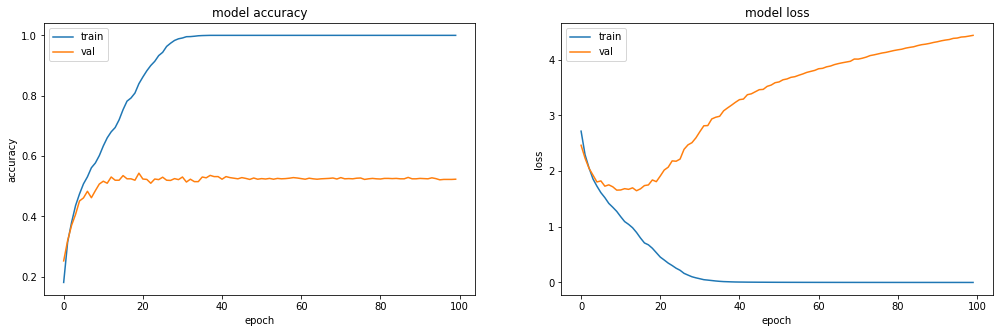

In [ ]:
lenet_adam = create_model_lenet()
model_creator(lenet_adam,Adam(),SparseCategoricalCrossentropy(),num_of_epochs=100)

In [ ]:
model_evaluation(lenet_adam)

Test Accuracy = 0.5475000143051147
Test Loss = 4.005221843719482


### 4) **CNN1**: CONV(16, 5), RELU, POOL(2), CONV(16,3), RELU, POOL(2), CONV(32, 3), RELU, FC(200), SOFTMAX

**Optimizer = Adam(), loss = SparseCategoricalCrossentropy(), metric = 'accuracy', epochs = 100**

Model: "sequential_86"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_122 (Conv2D)          (None, 28, 28, 16)        1216      
_________________________________________________________________
max_pooling2d_92 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_123 (Conv2D)          (None, 12, 12, 16)        2320      
_________________________________________________________________
max_pooling2d_93 (MaxPooling (None, 6, 6, 16)          0         
_________________________________________________________________
conv2d_124 (Conv2D)          (None, 4, 4, 32)          4640      
_________________________________________________________________
flatten_86 (Flatten)         (None, 512)               0         
_________________________________________________________________
dense_207 (Dense)            (None, 200)             

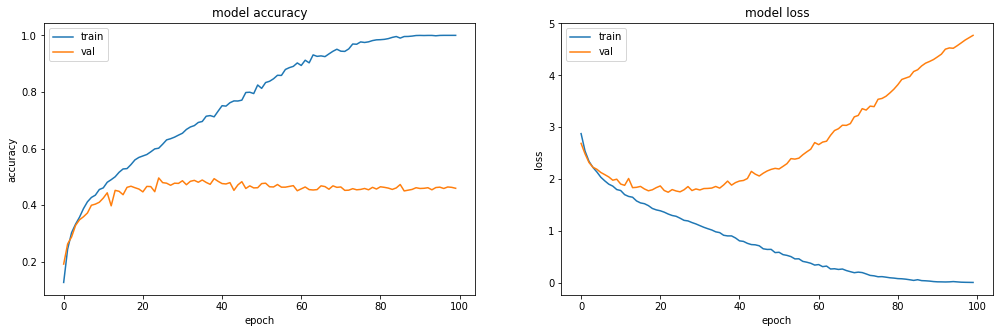

In [ ]:
cnn1_adam = create_model_cnn1()
model_creator(cnn1_adam,Adam(),SparseCategoricalCrossentropy(),num_of_epochs=100)

In [ ]:
model_evaluation(cnn1_adam)

Test Accuracy = 0.47999998927116394
Test Loss = 4.440171718597412


### 5) **CNN2**: Δικό μας μοντέλο

**Optimizer = Adam(), loss = SparseCategoricalCrossentropy(), metric = 'accuracy', epochs = 100**

Model: "sequential_87"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_125 (Conv2D)          (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_94 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_126 (Conv2D)          (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_95 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_127 (Conv2D)          (None, 4, 4, 128)         73856     
_________________________________________________________________
average_pooling2d_16 (Averag (None, 2, 2, 128)         0         
_________________________________________________________________
flatten_87 (Flatten)         (None, 512)             

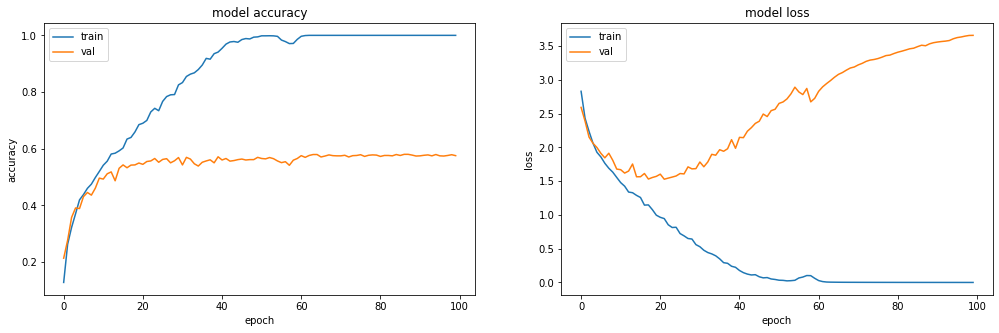

In [ ]:
cnn2_adam = create_model_cnn2()
model_creator(cnn2_adam,Adam(),SparseCategoricalCrossentropy(),num_of_epochs=100)

In [ ]:
model_evaluation(cnn2_adam)

Test Accuracy = 0.6044999957084656
Test Loss = 3.2892987728118896


## **Διαγράμματα ακρίβειας μοντέλων-μεγέθους δέσμης (batch size)**

Έχοντας εκπαιδεύσει τα μοντέλα για διαφορετικό batch size κατασκευάζουμε τα διαγράμματα που απεικονίζουν την επίδραση του batch size στο test accuracy και στο test loss.

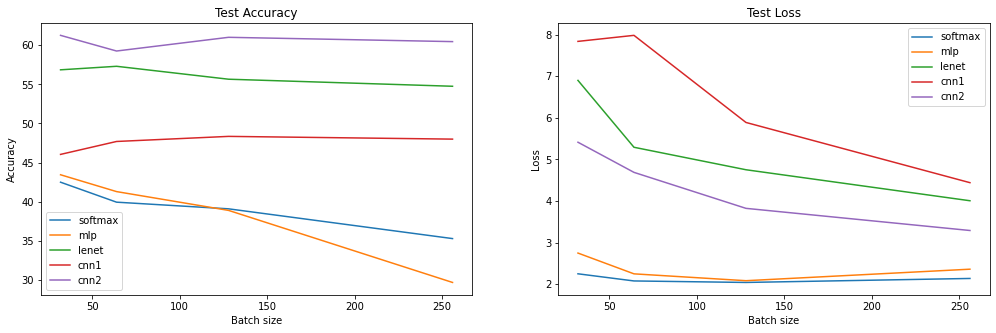

In [ ]:
fig, ax = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(17)

BATCHES = [32,64,128,256]

# Plot accuracy

ax[0].plot(BATCHES , [42.5,39.95,39.1,35.3], label='softmax')
ax[0].plot(BATCHES , [43.45,41.3,38.9,29.7], label='mlp')
ax[0].plot(BATCHES , [56.85,57.3,55.65,54.75], label='lenet')
ax[0].plot(BATCHES , [46.05,47.7,48.35,48], label='cnn1')
ax[0].plot(BATCHES , [61.25,59.25,61,60.45], label='cnn2')
ax[0].set_title("Test Accuracy")
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Batch size')
ax[0].legend(loc='best')

# Plot loss

ax[1].plot(BATCHES , [2.247,2.075,2.039,2.135], label='softmax')
ax[1].plot(BATCHES , [2.746,2.246,2.081,2.358], label='mlp')
ax[1].plot(BATCHES , [6.901,5.292,4.751,4.005], label='lenet')
ax[1].plot(BATCHES , [7.84,7.985,5.889,4.44], label='cnn1')
ax[1].plot(BATCHES , [5.413,4.688,3.822,3.289], label='cnn2')
ax[1].set_title("Test Loss")
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Batch size')
ax[1].legend(loc='best')

Το **μέγεθος δέσμης (batch size)** εκφράζει τον αριθμό των δειγμάτων του dataset που φορτώνονται μαζί σε κάποιο πέρασμα κατά την διαδικασία της εκπαίδευσης. Όσο μεγαλύτερο είναι τόσο μεγαλύτερη δέσμευση μνήμης απαιτείται. Αυξάνοντάς το από 32 σε 64, 128 και τέλος σε 256 παρατηρούμε ότι η απόδοση των περισσότερων μοντέλων δεν επηρεάζεται σημαντικά με εξαίρεση του mlp που εμφανίζει μια πτώση. Από την άλλη, το validation loss φαίνεται να μειώνεται για τα μοντέλα lenet, cnn1 και cnn2 με την αύξηση του batch size, γεγονός επιθυμητό αφού αυξάνεται η βεβαιότητα με την οποία αυτά κατατάσουν τις εικόνες σε κατηγορίες. Αξίζει να σημειωθεί ότι τα μεγθέτη του batch size που μελετήθηκαν είναι τα πιο συνήθη που χρησιμοποιούνται για την εκπαίδευση νευρωνικών δικτύων.

# **Έλεγχος Υπερεκπαίδευσης**

$ \LARGE \textit{Ερώτημα 2}$


Όπως παρατηρούμε στα διαγράμματα του Ερωτήματος 1, η ακρίβεια της εκπαίδευσης (test accuracy) αυξάνεται γραμμικά με την πάροδο του χρόνου, ενώ η ακρίβεια επικύρωσης (validation accuracy) καθυστερεί περίπου το 70% στη διαδικασία εκπαίδευσης. Η διαφορά αυτή ανάμεσα στις γραφικές παραστάσεις των δύο ακριβειών είναι στις περισσότερες περιπτώσεις αισθητή και αποτελεί ένα σημάδι του ***overfitting***. Το φαινόμενο αυτό παρατηρείται όταν υπάρχει ένας μικρός αριθμός δειγμάτων εκπαίδευσης οπότε το μοντέλο μερικές φορές μαθαίνει από θορύβους ή ανεπιθύμητες λεπτομέρειες από αυτά τα δείγματα, σε βαθμό που επηρεάζει αρνητικά την απόδοσή του σε νέα παραδείγματα. Αυτό σημαίνει ότι το μοντέλο δυσκολεύεται να γενικεύσει σε ένα νέο σύνολο δεδομένων. 

Υπάρχουν πολλοί τρόποι για την καταπολέμηση της υπερεκπαίδευσης. Μερικοί από αυτούς είναι:

- **Πρόωρος τερματισμός** (early stopping): Μια μέθοδος που τερματίζει την εκπαίδευση αν δεν υπάρχει βελτίωση ως προς τη μετρική απόδοσης που παρακολουθούμε.

- **Dropout**: Είναι μια μορφή κανονικοποίησης που αναγκάζει τα βάρη στο δίκτυο να λαμβάνουν μόνο μικρές τιμές, γεγονός που καθιστά την κατανομή των τιμών βάρους κανονική και το δίκτυο μπορεί να μειώσει την υπερεκπαίδευση σε μικρά δείγματα εκπαίδευσης. Όταν εφαρμόσουμε το dropout σε ένα επίπεδο, "πετάμε" τυχαία (θέτοντας τα μηδέν) ένα πλήθος μονάδων εξόδου από το επίπεδο που το εφαρμόζουμε, κατά τη διάρκεια της διαδικασίας εκπαίδευσης.

- **Επαύξηση δεδομένων**: Η υπερεκπαίδευση συνήθως συμβαίνει όταν έχουμε λίγα ή/και πολύ όμοια δεδομένα εκπαίδευσης. Ένας τρόπος να διορθωθεί αυτό το πρόβλημα είναι να αυξήσουμε τα δεδομένα (data augmentation). Το data augmentation δημιουργεί νέα δεδομένα εκπαίδευσης με βάση τα υπάρχοντα εφαρμόζοντας τυχαίους μετασχηματισμούς ώστε να προκύπτουν αληθοφανείς εικόνες. Για την επαύξηση των δεδομένων χρησιμοποιούμε το "ImageDataGenerator" του "tf.keras". Συγκεκριμένα, ορίζουμε αρχικά ένα σύνολο επιτρεπτών μετασχηματισμών (όπως πχ. περιστροφές, οριζόντιες/κατακόρυφες μετατοπίσεις κ.ο.κ). Στην συνέχεια δημιουργούμε δύο νέα σύνολα, x_train_augmented και y_train_augmented, τα οποία περιέχουν αντίστοιχα τις αρχικές εικόνες επαυξημένες κατά τις μετασχηματισμένες και τα label τους. Τελικώς το νέο σύνολο εκπαίδευσης είναι σχεδόν διπλάσιο του αρχικού. Με τον τρόπο αυτό περνάμε διαφορετικούς μετασχηματισμούς στο σύνολο δεδομένων εκπαίδευσης και τα "νέα" δεδομένα χρησιμοποιούνται κατά τη διάρκεια της εκπαιδευτικής διαδικασίας.

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt
datagen = ImageDataGenerator(rotation_range=90,
                 width_shift_range=0.1, height_shift_range=0.1,
                 horizontal_flip=True)

# Initialize number of batches
num_of_batches = 0

# Initial length of train dataset
initial_train_len = len(x_train)

# Initializations
x_train_augmented = x_train
y_train_augmented = y_train_new

for x_batch, y_batch in datagen.flow(x_train, y_train_new, batch_size=32):
        num_of_batches += 1           # Increase number_of_batches by 1
        for i in range(len(x_batch)): # For every image in x_batch do the following
            x_train_augmented = np.concatenate((x_train_augmented,np.array([x_batch[i]]))) # Append converted image to x_train_augmented dataset
            y_train_augmented = np.concatenate((y_train_augmented,np.array([y_batch[i]]))) # Append image's label to y_train_augmented
        if num_of_batches >= initial_train_len // 32:  # If number_of_batches >= initial_train_len // 32 then stop
           break

Using TensorFlow backend.


#### 1) **Model = Softmax, optimizer = SGD(), loss = SparseCategoricalCrossentropy(), metric = 'accuracy', epochs = 100** 

In [ ]:
def create_model_softmax_drop(): 
  # Create model
  model_softmax_drop = keras.Sequential([
      keras.layers.Flatten(input_shape=(32,32,3)),
      keras.layers.Dense(200, activation='relu'),
      keras.layers.Dropout(0.2),
      keras.layers.Dense(num_of_classes,activation='softmax')
  ])
  return model_softmax_drop

Epoch 1/100
531/531 [==============================] - 1s 2ms/step - loss: 2.7826 - accuracy: 0.1546 - val_loss: 2.5946 - val_accuracy: 0.2173
Epoch 2/100
531/531 [==============================] - 1s 2ms/step - loss: 2.5887 - accuracy: 0.2171 - val_loss: 2.5388 - val_accuracy: 0.2267
Epoch 3/100
531/531 [==============================] - 1s 2ms/step - loss: 2.5055 - accuracy: 0.2442 - val_loss: 2.4273 - val_accuracy: 0.2607
Epoch 4/100
531/531 [==============================] - 1s 2ms/step - loss: 2.4564 - accuracy: 0.2604 - val_loss: 2.4082 - val_accuracy: 0.2693
Epoch 5/100
531/531 [==============================] - 1s 2ms/step - loss: 2.4114 - accuracy: 0.2713 - val_loss: 2.3377 - val_accuracy: 0.2960
Epoch 6/100
531/531 [==============================] - 1s 2ms/step - loss: 2.3710 - accuracy: 0.2866 - val_loss: 2.3178 - val_accuracy: 0.3060
Epoch 7/100
531/531 [==============================] - 1s 2ms/step - loss: 2.3405 - accuracy: 0.2950 - val_loss: 2.3160 - val_accuracy: 0.3193

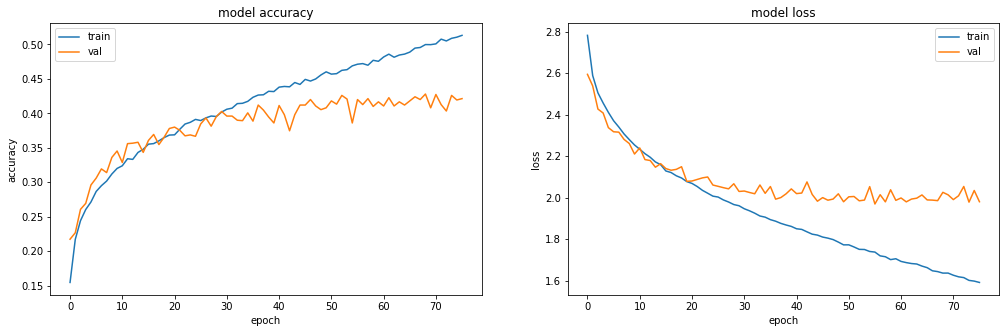

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Create model
model_softmax_drop = create_model_softmax_drop()

# Compile model
model_softmax_drop.compile(optimizer=SGD(), loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])

# Train model
history = model_softmax_drop.fit(x_train_augmented, y_train_augmented, epochs=100, validation_data=(x_val,y_val_new), callbacks=[callback])

fig, ax = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(17)

# Plot accuracy
ax[0].plot(history.history['accuracy'], label = "train")
ax[0].plot(history.history['val_accuracy'], label = "val")
ax[0].set_title('model accuracy')
ax[0].set_ylabel('accuracy')
ax[0].set_xlabel('epoch')
ax[0].legend(loc='best')

# Plot loss
ax[1].plot(history.history['loss'], label="train")
ax[1].plot(history.history['val_loss'], label="val")
ax[1].set_title('model loss')
ax[1].set_ylabel('loss')
ax[1].set_xlabel('epoch')
ax[1].legend(loc='best')

In [ ]:
# Evaluate model
model_evaluation(model_softmax_drop)

Test Accuracy = 0.4399999976158142
Test Loss = 1.8965529203414917


#### 2) **Model = MLP, optimizer = SGD(), loss = SparseCategoricalCrossentropy(), metric = 'accuracy', epochs = 100**

In [ ]:
def create_model_mlp_drop():
  model_mlp_drop = keras.Sequential([
  keras.layers.Flatten(input_shape=(32,32,3)),
  keras.layers.Dense(512, activation='relu'),
  keras.layers.Dropout(0.2),
  keras.layers.Dense(200, activation='relu'),
  keras.layers.Dropout(0.2),
  keras.layers.Dense(num_of_classes, activation='softmax')
])
  return model_mlp_drop

Epoch 1/100
531/531 [==============================] - 1s 3ms/step - loss: 2.8157 - accuracy: 0.1441 - val_loss: 2.6001 - val_accuracy: 0.2033
Epoch 2/100
531/531 [==============================] - 1s 2ms/step - loss: 2.6213 - accuracy: 0.2042 - val_loss: 2.4777 - val_accuracy: 0.2547
Epoch 3/100
531/531 [==============================] - 1s 2ms/step - loss: 2.5249 - accuracy: 0.2325 - val_loss: 2.4248 - val_accuracy: 0.2593
Epoch 4/100
531/531 [==============================] - 1s 2ms/step - loss: 2.4665 - accuracy: 0.2510 - val_loss: 2.4049 - val_accuracy: 0.2567
Epoch 5/100
531/531 [==============================] - 1s 2ms/step - loss: 2.4255 - accuracy: 0.2604 - val_loss: 2.3288 - val_accuracy: 0.2907
Epoch 6/100
531/531 [==============================] - 1s 3ms/step - loss: 2.3799 - accuracy: 0.2772 - val_loss: 2.3111 - val_accuracy: 0.2953
Epoch 7/100
531/531 [==============================] - 1s 3ms/step - loss: 2.3387 - accuracy: 0.2896 - val_loss: 2.2651 - val_accuracy: 0.3240

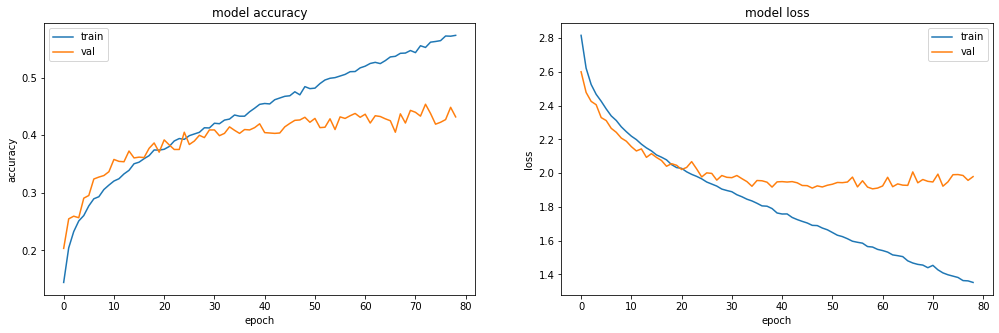

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Create model
model_mlp_drop = create_model_mlp_drop()

# Compile model
model_mlp_drop.compile(optimizer=SGD(), loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])

# Train model
history = model_mlp_drop.fit(x_train_augmented, y_train_augmented, epochs=100, validation_data=(x_val,y_val_new), callbacks=[callback])

fig, ax = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(17)

# Plot accuracy
ax[0].plot(history.history['accuracy'], label = "train")
ax[0].plot(history.history['val_accuracy'], label = "val")
ax[0].set_title('model accuracy')
ax[0].set_ylabel('accuracy')
ax[0].set_xlabel('epoch')
ax[0].legend(loc='best')

# Plot loss
ax[1].plot(history.history['loss'], label="train")
ax[1].plot(history.history['val_loss'], label="val")
ax[1].set_title('model loss')
ax[1].set_ylabel('loss')
ax[1].set_xlabel('epoch')
ax[1].legend(loc='best')

In [ ]:
# Evaluate model
model_evaluation(model_mlp_drop)

Test Accuracy = 0.4544999897480011
Test Loss = 1.8394807577133179


#### 3) **Model = LeNet, optimizer = Adam(), loss = SparseCategoricalCrossentropy(), metric = 'accuracy', epochs = 100**

In [ ]:
def create_model_lenet_drop(): 
  model_lenet_drop = models.Sequential()
  model_lenet_drop.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3))) 
  model_lenet_drop.add(layers.MaxPooling2D((2, 2)))
  model_lenet_drop.add(layers.Dropout(0.1))
  model_lenet_drop.add(layers.Conv2D(32, (3, 3), activation='relu'))
  model_lenet_drop.add(layers.MaxPooling2D((2, 2)))
  model_lenet_drop.add(layers.Dropout(0.1))
  model_lenet_drop.add(layers.Flatten())
  model_lenet_drop.add(layers.Dense(512, activation='relu'))
  model_lenet_drop.add(layers.Dropout(0.2))
  model_lenet_drop.add(layers.Dense(200, activation='relu'))
  model_lenet_drop.add(layers.Dropout(0.4))
  model_lenet_drop.add(layers.Dense(num_of_classes, activation='softmax'))
  return model_lenet_drop

Epoch 1/100
531/531 [==============================] - 2s 4ms/step - loss: 2.6047 - accuracy: 0.2017 - val_loss: 2.1451 - val_accuracy: 0.3693
Epoch 2/100
531/531 [==============================] - 2s 3ms/step - loss: 2.1783 - accuracy: 0.3348 - val_loss: 1.9285 - val_accuracy: 0.4107
Epoch 3/100
531/531 [==============================] - 2s 3ms/step - loss: 1.9959 - accuracy: 0.3889 - val_loss: 1.8116 - val_accuracy: 0.4540
Epoch 4/100
531/531 [==============================] - 2s 3ms/step - loss: 1.8509 - accuracy: 0.4305 - val_loss: 1.7201 - val_accuracy: 0.4927
Epoch 5/100
531/531 [==============================] - 2s 3ms/step - loss: 1.7296 - accuracy: 0.4617 - val_loss: 1.6195 - val_accuracy: 0.5100
Epoch 6/100
531/531 [==============================] - 2s 3ms/step - loss: 1.6220 - accuracy: 0.4966 - val_loss: 1.5788 - val_accuracy: 0.5220
Epoch 7/100
531/531 [==============================] - 2s 3ms/step - loss: 1.5089 - accuracy: 0.5268 - val_loss: 1.6009 - val_accuracy: 0.5400

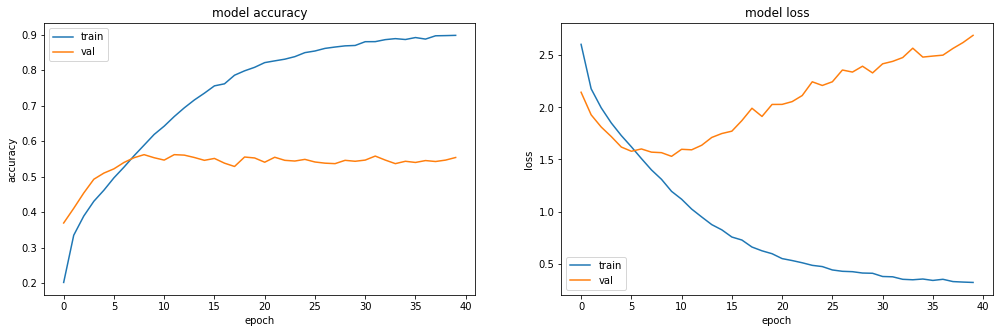

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)

# Create model
model_lenet_drop = create_model_lenet_drop()

# Compile model
model_lenet_drop.compile(optimizer=Adam(), loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])

# Train model
history = model_lenet_drop.fit(x_train_augmented, y_train_augmented, epochs=100, validation_data=(x_val,y_val_new), callbacks=[callback])

fig, ax = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(17)

# Plot accuracy
ax[0].plot(history.history['accuracy'], label = "train")
ax[0].plot(history.history['val_accuracy'], label = "val")
ax[0].set_title('model accuracy')
ax[0].set_ylabel('accuracy')
ax[0].set_xlabel('epoch')
ax[0].legend(loc='best')

# Plot loss
ax[1].plot(history.history['loss'], label="train")
ax[1].plot(history.history['val_loss'], label="val")
ax[1].set_title('model loss')
ax[1].set_ylabel('loss')
ax[1].set_xlabel('epoch')
ax[1].legend(loc='best')

In [ ]:
# Evaluate model
model_evaluation(model_lenet_drop)

Test Accuracy = 0.5910000205039978
Test Loss = 1.375825047492981


#### 4) **Model = CNN1, optimizer = Adam(), loss = SparseCategoricalCrossentropy(), metric = 'accuracy', epochs = 100**

In [ ]:
def create_model_cnn1_drop():
  model_cnn1 = models.Sequential()
  model_cnn1.add(layers.Conv2D(16, (5, 5), activation='relu', input_shape=(32, 32, 3))) 
  model_cnn1.add(layers.MaxPooling2D((2, 2)))
  model_cnn1.add(layers.Dropout(0.1))
  model_cnn1.add(layers.Conv2D(16, (3, 3), activation='relu'))
  model_cnn1.add(layers.MaxPooling2D((2, 2)))
  model_cnn1.add(layers.Dropout(0.2))
  model_cnn1.add(layers.Conv2D(32, (3, 3), activation='relu'))
  model_cnn1.add(layers.Flatten())
  model_cnn1.add(layers.Dense(200, activation='relu'))
  model_cnn1.add(layers.Dropout(0.4))
  model_cnn1.add(layers.Dense(num_of_classes, activation='softmax'))
  return model_cnn1

Epoch 1/100
531/531 [==============================] - 2s 4ms/step - loss: 2.7039 - accuracy: 0.1703 - val_loss: 2.4067 - val_accuracy: 0.2667
Epoch 2/100
531/531 [==============================] - 2s 3ms/step - loss: 2.3884 - accuracy: 0.2721 - val_loss: 2.2294 - val_accuracy: 0.3173
Epoch 3/100
531/531 [==============================] - 2s 3ms/step - loss: 2.2480 - accuracy: 0.3079 - val_loss: 2.0757 - val_accuracy: 0.3660
Epoch 4/100
531/531 [==============================] - 2s 3ms/step - loss: 2.1544 - accuracy: 0.3350 - val_loss: 1.9985 - val_accuracy: 0.3953
Epoch 5/100
531/531 [==============================] - 2s 3ms/step - loss: 2.0947 - accuracy: 0.3576 - val_loss: 1.9506 - val_accuracy: 0.4240
Epoch 6/100
531/531 [==============================] - 2s 3ms/step - loss: 2.0500 - accuracy: 0.3659 - val_loss: 1.9745 - val_accuracy: 0.4173
Epoch 7/100
531/531 [==============================] - 2s 3ms/step - loss: 1.9994 - accuracy: 0.3803 - val_loss: 1.8660 - val_accuracy: 0.4333

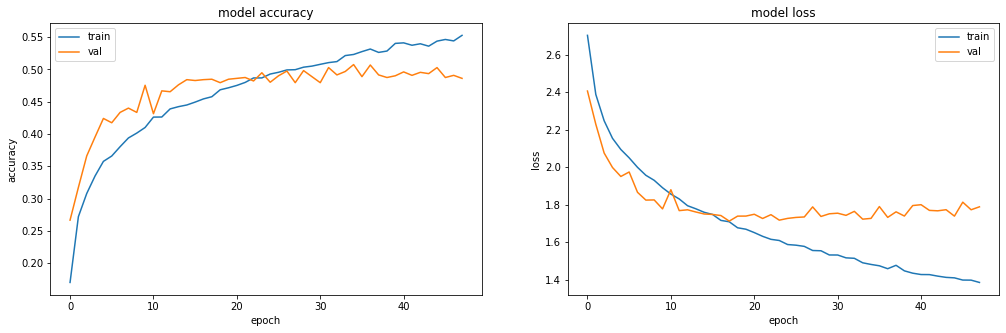

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)

# Create model
model_cnn1_drop = create_model_cnn1_drop()

# Compile model
model_cnn1_drop.compile(optimizer=Adam(), loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])

# Train model
history = model_cnn1_drop.fit(x_train_augmented, y_train_augmented, epochs=100, validation_data=(x_val,y_val_new), callbacks=[callback])

fig, ax = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(17)

# Plot accuracy
ax[0].plot(history.history['accuracy'], label = "train")
ax[0].plot(history.history['val_accuracy'], label = "val")
ax[0].set_title('model accuracy')
ax[0].set_ylabel('accuracy')
ax[0].set_xlabel('epoch')
ax[0].legend(loc='best')

# Plot loss
ax[1].plot(history.history['loss'], label="train")
ax[1].plot(history.history['val_loss'], label="val")
ax[1].set_title('model loss')
ax[1].set_ylabel('loss')
ax[1].set_xlabel('epoch')
ax[1].legend(loc='best')

In [ ]:
# Evaluate model
model_evaluation(model_cnn1_drop)

Test Accuracy = 0.5055000185966492
Test Loss = 1.6231662034988403


#### 5) **Model = CNN2, optimizer = Adam(), loss = SparseCategoricalCrossentropy(), metric = 'accuracy', epochs = 100**

In [ ]:
def create_model_cnn2_drop():
  model_cnn2 = models.Sequential()
  model_cnn2.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3))) 
  model_cnn2.add(layers.MaxPooling2D((2, 2)))
  model_cnn2.add(layers.Conv2D(64, (3, 3), activation='relu'))
  model_cnn2.add(layers.MaxPooling2D((2, 2)))
  model_cnn2.add(layers.Dropout(0.4))
  model_cnn2.add(layers.Conv2D(128, (3, 3), activation='relu'))
  model_cnn2.add(layers.AveragePooling2D((2, 2)))
  model_cnn2.add(layers.Dropout(0.4))
  model_cnn2.add(layers.Flatten())
  model_cnn2.add(layers.Dense(1024,activation='relu'))
  model_cnn2.add(layers.Dropout(0.4))
  model_cnn2.add(layers.Dense(num_of_classes,activation='softmax'))
  return model_cnn2

Epoch 1/100
531/531 [==============================] - 2s 4ms/step - loss: 2.6398 - accuracy: 0.1895 - val_loss: 2.2891 - val_accuracy: 0.3160
Epoch 2/100
531/531 [==============================] - 2s 4ms/step - loss: 2.2491 - accuracy: 0.3083 - val_loss: 2.0162 - val_accuracy: 0.3880
Epoch 3/100
531/531 [==============================] - 2s 3ms/step - loss: 2.0900 - accuracy: 0.3569 - val_loss: 1.8165 - val_accuracy: 0.4553
Epoch 4/100
531/531 [==============================] - 2s 3ms/step - loss: 1.9747 - accuracy: 0.3896 - val_loss: 1.7462 - val_accuracy: 0.4760
Epoch 5/100
531/531 [==============================] - 2s 3ms/step - loss: 1.8976 - accuracy: 0.4137 - val_loss: 1.6806 - val_accuracy: 0.5047
Epoch 6/100
531/531 [==============================] - 2s 3ms/step - loss: 1.8154 - accuracy: 0.4287 - val_loss: 1.6702 - val_accuracy: 0.5080
Epoch 7/100
531/531 [==============================] - 2s 3ms/step - loss: 1.7613 - accuracy: 0.4525 - val_loss: 1.5967 - val_accuracy: 0.5240

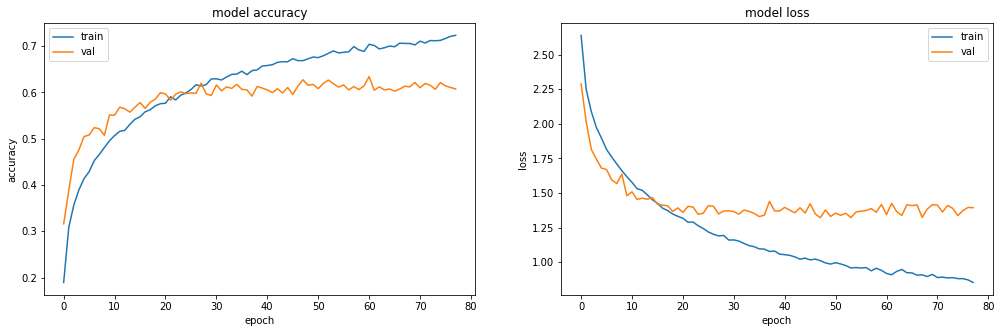

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)

# Create model
model_cnn2_drop = create_model_cnn2_drop()

# Compile model
model_cnn2_drop.compile(optimizer=Adam(), loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])

# Train model
history = model_cnn2_drop.fit(x_train_augmented, y_train_augmented, epochs=100, validation_data=(x_val,y_val_new), callbacks=[callback])

fig, ax = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(17)

# Plot accuracy
ax[0].plot(history.history['accuracy'], label = "train")
ax[0].plot(history.history['val_accuracy'], label = "val")
ax[0].set_title('model accuracy')
ax[0].set_ylabel('accuracy')
ax[0].set_xlabel('epoch')
ax[0].legend(loc='best')

# Plot loss
ax[1].plot(history.history['loss'], label="train")
ax[1].plot(history.history['val_loss'], label="val")
ax[1].set_title('model loss')
ax[1].set_ylabel('loss')
ax[1].set_xlabel('epoch')
ax[1].legend(loc='best')

In [ ]:
# Evaluate model
model_evaluation(model_cnn2_drop)

Test Accuracy = 0.637499988079071
Test Loss = 1.2389219999313354


Στον ακόλουθο πίνακα φαίνονται τα ποσοστά που αντιστοιχούν στο **test accuracy** πριν και μετά την προσθήκη των τεχνικών αντιμετώπισης της υπερεκπαίδευσης (early stopping, dropout, data augmentation).

$\begin{array}{|C{6cm}||C{6cm} |C{7cm}|} 
    \hline
    \textbf{Model} & \textbf{Before} & \textbf{After} 
    \\\hline
    \textbf{Softmax} & 42.5 \% &  44 \% 
    \\\hline
    \textbf{Mlp} & 43.45 \% & 45.45 \%
    \\\hline
    \textbf{LeNet} &  56.85 \% & 59.1 \%
    \\\hline
    \textbf{Cnn1} &  46.05 \% & 50.55 \%
    \\\hline
    \textbf{Cnn2} & 61.25 \% & 63.75 \%
    \\\hline
\end{array}$

Αντίστοιχα στον ακόλουθο πίνακα φαίνονται τα νούμερα που αντιστοιχούν στο **test loss** πριν και μετά την προσθήκη των τεχνικών αντιμετώπισης της υπερεκπαίδευσης.

 $\begin{array}{|C{6cm}||C{6cm} |C{7cm}|} 
    \hline
    \textbf{Model} & \textbf{Before} & \textbf{After} 
    \\\hline
    \textbf{Softmax} & 2.247 &  1.896 
    \\\hline
    \textbf{Mlp} & 2.746  & 1.839 
    \\\hline
    \textbf{LeNet} & 6.901  & 1.376 
    \\\hline
    \textbf{Cnn1} & 7.840  & 1.623
    \\\hline
    \textbf{Cnn2} & 5.413 & 1.239
    \\\hline
\end{array}$

Παρατηρούμε πως σε όλα τα μοντέλα η υλοποίηση των τεχνικών για την αντιμετώπιση του προβλήματος της υπερεκπαίδευσης έχει σαν αποτέλεσμα την αύξηση της ακρίβειας για το σύνολο ελέγχου (test set) και την μείωση σε μεγάλο βαθμό του test loss. Επιπλέον, όπως φαίνεται και από τα παραπάνω διαγράμματα οι δύο καμπύλες που αντιστοιχούν στην ακρίβεια εκπαίδευσης και την ακρίβεια επικύρωσης στο σύνολο των εποχών δεν αποκλίνουν στον βαθμό που απέκλιναν πριν την προσθήκη των τεχνικών αντιμετώπισης του overfitting. Το γεγονός αυτό επιβεβαιώνει την αποτελεσματικότητα των μεθόδων μας καθώς τα μοντέλα γενικεύουν καλύτερα. Συγκεκριμένα, με τον πρόωρο τερματισμό η εκπαιδευτική διαδικασία τερματίζει, επιστρέφοντας τα καλύτερα βάρη που έχουν υπολογιστεί μέχρι εκείνη την στιγμή (restore_best_weights=True), αν δεν υπάρχει μείωση του validation loss για αριθμό εποχών μεγαλύτερο του 20 (patience=20). Αναφορικά με το dropout ο τυχαίος μηδενισμός ενός ποσοστού των βαρών ισοδυναμεί με την εκπαίδευση διαφορετικών νευρωνικών δικτύων. Με τον τρόπο αυτό το μοντέλο μαθεύει να γενικεύει καλύτερα. Τέλος, η αύξηση των δεδομένων (data augmentation) με βάση τα υπάρχοντα αντιμετωπίζει ένα βασικό πρόβλημα το οποίο ευθύνεται για την υπερεκπαίδευση, την έλλειψη ενός μεγάλου αριθμού δεδομένων για το σύνολο εκπαίδευσης.

# **Transfer Learning**

$ \LARGE \textit{Ερώτημα 3}$


Η μεταφορά μάθησης (Transfer Learning) είναι ένα ερευνητικό πρόβλημα στην περιοχή της μηχανικής μάθησης που επικεντρώνεται στην αποθήκευση των γνώσεων που αποκτήθηκαν από την επίλυση ενός προβλήματος και την αξιοποίησή τους για την εφαρμογή τους σε ένα άλλο διαφορετικό αλλά σχετικό πρόβλημα. 

Εφαρμόζουμε transfer learning επιλέγοντας μέσω του tf.keras.applications ως μοντέλο για μεταφορά μάθησης το MobileNet V2.


### Βήμα 1
"Παγώνουμε" τη συνελικτική βάση και εκπαιδεύουμε μόνο την κεφαλή ταξινόμησης. Τα επιμέρους βήματα που ακολουθούνται φαίνονται παρακάτω.

1. Δημιουργία των train, test και validation dataset.

In [ ]:
def create_dataset(x,y):
  dataset =  tf.data.Dataset.from_tensor_slices((x,y))
  return dataset

In [ ]:
train_dataset = create_dataset(x_train,y_train_new)
test_dataset = create_dataset(x_test,y_test_new)
val_dataset = create_dataset(x_val,y_val_new)

2. Αλλαγή μεγέθους των εικόνων από (32,32,3) σε (160,160,3) μέσω της tf.image.resize.

In [ ]:
IMG_SIZE = 160

def resize_transform(image,label):
  return tf.image.resize(image, (IMG_SIZE, IMG_SIZE)),label

Εφαρμογή της συνάρτησης resize_transform σε κάθε στοιχείο του συνόλου δεδομένων.

In [ ]:
train_dataset_res = train_dataset.map(resize_transform)
val_dataset_res = val_dataset.map(resize_transform)
test_dataset_res = test_dataset.map(resize_transform)

3. "Ανακάτεμα" και χωρισμός των δεδομένων σε batches.

In [ ]:
BATCH_SIZE = 32
SHUFFLE_BUFFER_SIZE = 10000

train_batches = train_dataset_res.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
validation_batches = val_dataset_res.batch(BATCH_SIZE)
test_batches = test_dataset_res.batch(BATCH_SIZE)

4. Δημιουργία του base model από το προ-εκπαιδευμένο μοντέλο MobileNet V2. Στο βήμα αυτό φροντίζουμε να παγώσουμε τη συνελικτική βάση πριν καταρτίσουμε και εκπαιδεύσουμε το μοντέλο. Η ρύθμιση layer.trainable = False αποτρέπει την ενημέρωση των βαρών σε ένα δεδομένο επίπεδο κατά τη διάρκεια της εκπαίδευσης. Το MobileNet V2 έχει πολλά επίπεδα, οπότε η ρύθμιση της εκπαιδευόμενης σημαίας ολόκληρου του μοντέλου σε False θα παγώσει όλα τα επίπεδα.

In [ ]:
# Create the base model from the pre-trained model MobileNet V2
base_model = tf.keras.applications.MobileNetV2(input_shape=(IMG_SIZE, IMG_SIZE, 3),
                                                include_top=False,
                                                weights='imagenet')

base_model.trainable = False

9412608/9406464 [==============================] - 0s 0us/step


5. Δημιουργία τελικού μοντέλου, μεταγλώττιση και εκπαίδευση. 

In [ ]:
def transfer_learning(num_of_classes,num_of_epochs,opt,loss_function):

  global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
  dense_layer = tf.keras.layers.Dense(1024,activation='relu')
  prediction_layer = tf.keras.layers.Dense(num_of_classes,activation='softmax')

  # Create final model
  model = tf.keras.Sequential([
    base_model,
    global_average_layer,
    dense_layer,
    prediction_layer
  ])

  # Compile model
  model.compile(
    optimizer=opt,
    loss=loss_function,
    metrics=['accuracy'])

  # Model summary
  model.summary()

  # Train model
  history = model.fit(train_batches, epochs=num_of_epochs, validation_data=validation_batches)

  # Learning curves
  fig, ax = plt.subplots(1, 2)

  fig.set_figheight(5)
  fig.set_figwidth(17)

  # Plot accuracy
  ax[0].plot(history.history['accuracy'])
  ax[0].plot(history.history['val_accuracy'])
  ax[0].set_title('model accuracy')
  ax[0].set_ylabel('accuracy')
  ax[0].set_xlabel('epoch')
  ax[0].legend(['train', 'val'], loc='best')

  # Plot loss
  ax[1].plot(history.history['loss'])
  ax[1].plot(history.history['val_loss'])
  ax[1].set_title('model loss')
  ax[1].set_ylabel('loss')
  ax[1].set_xlabel('epoch')
  ax[1].legend(['train', 'val'], loc='best')

  plt.show()

  return model

In [ ]:
def transfer_learning_model_evaluation(model):
  test_loss, test_acc = model.evaluate(test_batches, verbose=0)
  print("Test Accuracy =",test_acc)
  print("Test Loss =",test_loss)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_160 (Model) (None, 5, 5, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 1024)              1311744   
_________________________________________________________________
dense_17 (Dense)             (None, 20)                20500     
Total params: 3,590,228
Trainable params: 1,332,244
Non-trainable params: 2,257,984
_________________________________________________________________
Epoch 1/100
266/266 [==============================] - 166s 624ms/step - loss: 1.0163 - accuracy: 0.6872 - val_loss: 0.8292 - val_accuracy: 0.7260
Epoch 2/100
266/266 [==============================] - 167s 626ms/step - loss: 0.5650 -

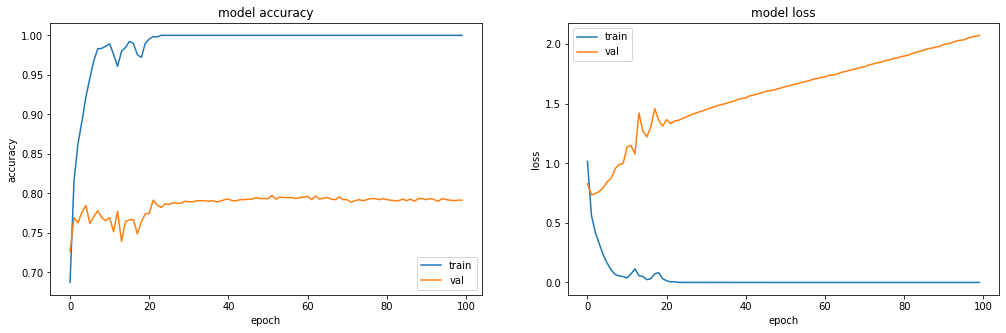

In [ ]:
model_tl1 = transfer_learning(20,100,Adam(),SparseCategoricalCrossentropy())

In [ ]:
transfer_learning_model_evaluation(model_tl1)

Test Accuracy = 0.7870000004768372
Test Loss = 2.269366979598999


Παρατηρούμε πως το test accuracy αυξάνεται σημαντικά από **61.25 %** που ήταν για το Cnn2 σε **78.7 %**. Το γεγονός αυτό είναι αναμενόμενο καθώς χρησιμοποιείται σαν base model το προεκπαιδευμένο MobileNet V2 το οποίο είναι ένα αρκετά βαθύ νευρωνικό δίκτυο με 154 layers. Ομοίως το test loss μειώνεται από **5.413** σε **2.269**.

### Βήμα 2
Εκπαιδεύουμε τώρα μόνο ένα ποσοστό των επιπέδων, το οποίο βρίσκεται προς την έξοδο του δικτύου. Στο βήμα αυτό οι σημαίες trainable ορίζονται ανά επίπεδο. Για τον λόγο αυτό εκτυπώνουμε τα layers του προ-εκπαιδευμένου MobileNet V2 μοντέλου και επιλέγουμε ποια από αυτά θα οριστούν ως trainable και ποια όχι.

In [ ]:
for i,layer in enumerate(base_model.layers):
  print(i,layer.name)

for layer in base_model.layers[:152]:
    layer.trainable=False
for layer in base_model.layers[152:]:
    layer.trainable=True

0 input_1
1 Conv1_pad
2 Conv1
3 bn_Conv1
4 Conv1_relu
5 expanded_conv_depthwise
6 expanded_conv_depthwise_BN
7 expanded_conv_depthwise_relu
8 expanded_conv_project
9 expanded_conv_project_BN
10 block_1_expand
11 block_1_expand_BN
12 block_1_expand_relu
13 block_1_pad
14 block_1_depthwise
15 block_1_depthwise_BN
16 block_1_depthwise_relu
17 block_1_project
18 block_1_project_BN
19 block_2_expand
20 block_2_expand_BN
21 block_2_expand_relu
22 block_2_depthwise
23 block_2_depthwise_BN
24 block_2_depthwise_relu
25 block_2_project
26 block_2_project_BN
27 block_2_add
28 block_3_expand
29 block_3_expand_BN
30 block_3_expand_relu
31 block_3_pad
32 block_3_depthwise
33 block_3_depthwise_BN
34 block_3_depthwise_relu
35 block_3_project
36 block_3_project_BN
37 block_4_expand
38 block_4_expand_BN
39 block_4_expand_relu
40 block_4_depthwise
41 block_4_depthwise_BN
42 block_4_depthwise_relu
43 block_4_project
44 block_4_project_BN
45 block_4_add
46 block_5_expand
47 block_5_expand_BN
48 block_5_exp

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_160 (Model) (None, 5, 5, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d_1 ( (None, 1280)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 1024)              1311744   
_________________________________________________________________
dense_19 (Dense)             (None, 20)                20500     
Total params: 3,590,228
Trainable params: 1,332,244
Non-trainable params: 2,257,984
_________________________________________________________________
Epoch 1/100
266/266 [==============================] - 172s 648ms/step - loss: 0.9628 - accuracy: 0.6993 - val_loss: 1.0845 - val_accuracy: 0.6967
Epoch 2/100
266/266 [==============================] - 173s 652ms/step - loss: 0.5307 -

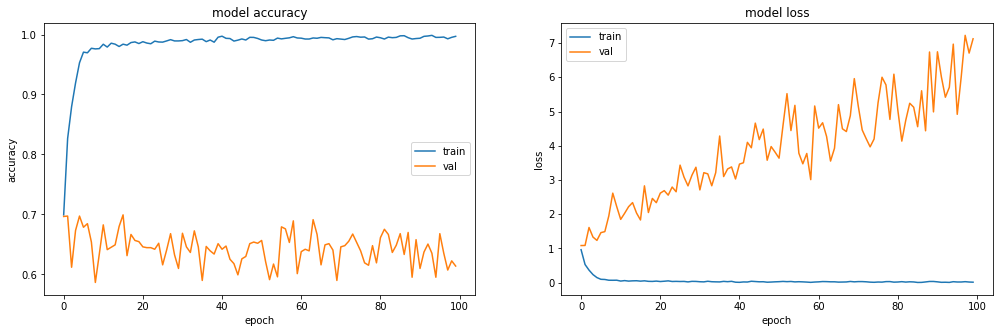

In [ ]:
model_tl2 = transfer_learning(20,100,Adam(),SparseCategoricalCrossentropy())

In [ ]:
transfer_learning_model_evaluation(model_tl2)

Test Accuracy = 0.6065000295639038
Test Loss = 7.457409858703613


Εδώ παρατηρούμε πως το μοντέλο αποδίδει χειρότερα σε σχέση με πριν. Συγκεκριμένα, το test accuracy μειώνεται από  **61.25 %** σε **60.65 %** ενώ το test loss αυξάνεται από **5.413** σε **7.457**. Το γεγονός αυτό οφείλεται στο ότι η εκπαίδευση ενός ποσοστού των επιπέδων του base model αποδίδει καλύτερα όταν το dataset είναι αρκετά μεγάλο, κάτι που δεν ισχύει στην περίπτωση των 20 κλάσεων όπου το σύνολο εκπαίδευσης έχει μόλις 8500 δεδομένα.